In [1]:
#Annual Average in µg/m^{3} about data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix



# Reading Dataset using pandas

In [3]:
data=pd.read_csv("C:\\Users\\Palak Goel\\Desktop\\AQI\\AQI_data.csv", encoding= 'unicode_escape')

### Dataset

In [4]:
data.head(40)

,State_UT,City,SO2,NO2,PM10,PM2.5
0,Andhra Pradesh,Amaravati,14.0,12.0,55.0,28.0
1,Andhra Pradesh,Anatapur,7.0,16.0,64.0,30.0
2,Andhra Pradesh,Chittor,5.0,14.0,46.0,25.0
3,Andhra Pradesh,Eluru,5.0,17.0,63.0,30.0
4,Andhra Pradesh,Guntur,5.0,17.0,60.0,29.0
5,Andhra Pradesh,Kadapa,5.0,14.0,53.0,26.0
6,Andhra Pradesh,Kakinada,8.0,14.0,61.0,28.0
7,Andhra Pradesh,Kurnool,6.0,15.0,58.0,26.0
8,Andhra Pradesh,Nellore,5.0,17.0,55.0,23.0
9,Andhra Pradesh,Ongole,5.0,17.0,53.0,18.0


In [5]:

data['SO2'] = data['SO2'].astype('float64', copy=True)

In [6]:
#Annual Average in µg/m^{3}
data.shape

(397, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State_UT  397 non-null    object 
 1   City      397 non-null    object 
 2   SO2       390 non-null    float64
 3   NO2       392 non-null    float64
 4   PM10      391 non-null    float64
 5   PM2.5     263 non-null    float64
dtypes: float64(4), object(2)
memory usage: 18.7+ KB


In [8]:
data.isnull().sum()


State_UT      0
City          0
SO2           7
NO2           5
PM10          6
PM2.5       134
dtype: int64

In [9]:
data.describe()

,SO2,NO2,PM10,PM2.5
count,390.000000,392.000000,391.000000,263.000000
mean,9.630769,20.382653,93.309463,42.326996
std,6.721188,11.101324,48.069436,22.839289
min,2.000000,3.000000,17.000000,6.000000
25%,5.000000,13.000000,59.000000,26.500000
50%,8.000000,18.000000,84.000000,35.000000
75%,13.000000,26.000000,118.000000,54.500000
max,40.000000,70.000000,319.000000,110.000000


In [10]:
data.nunique()


State_UT     33
City        397
SO2          34
NO2          49
PM10        152
PM2.5        89
dtype: int64

In [11]:
df=data

In [12]:
df.columns

Index(['State_UT', 'City', 'SO2', 'NO2', 'PM10', 'PM2.5'], dtype='object')

In [13]:
df['State_UT'].value_counts()

West Bengal                                    41
Punjab                                         36
Uttar Pradesh                                  27
Karnataka                                      26
Maharashtra                                    25
Haryana                                        24
Madhya Pradesh                                 19
Tamilnadu                                      17
Odisha                                         17
Andhra Pradesh                                 16
Goa                                            16
Kerala                                         14
Assam                                          13
Gujarat                                        12
Himachal Pradesh                               11
Telangana                                      11
Rajasthan                                      10
Mizoram                                        10
Sikkim                                          8
Jharkhand                                       8


# The visualization shows us the count of states present in the dataset.

[]

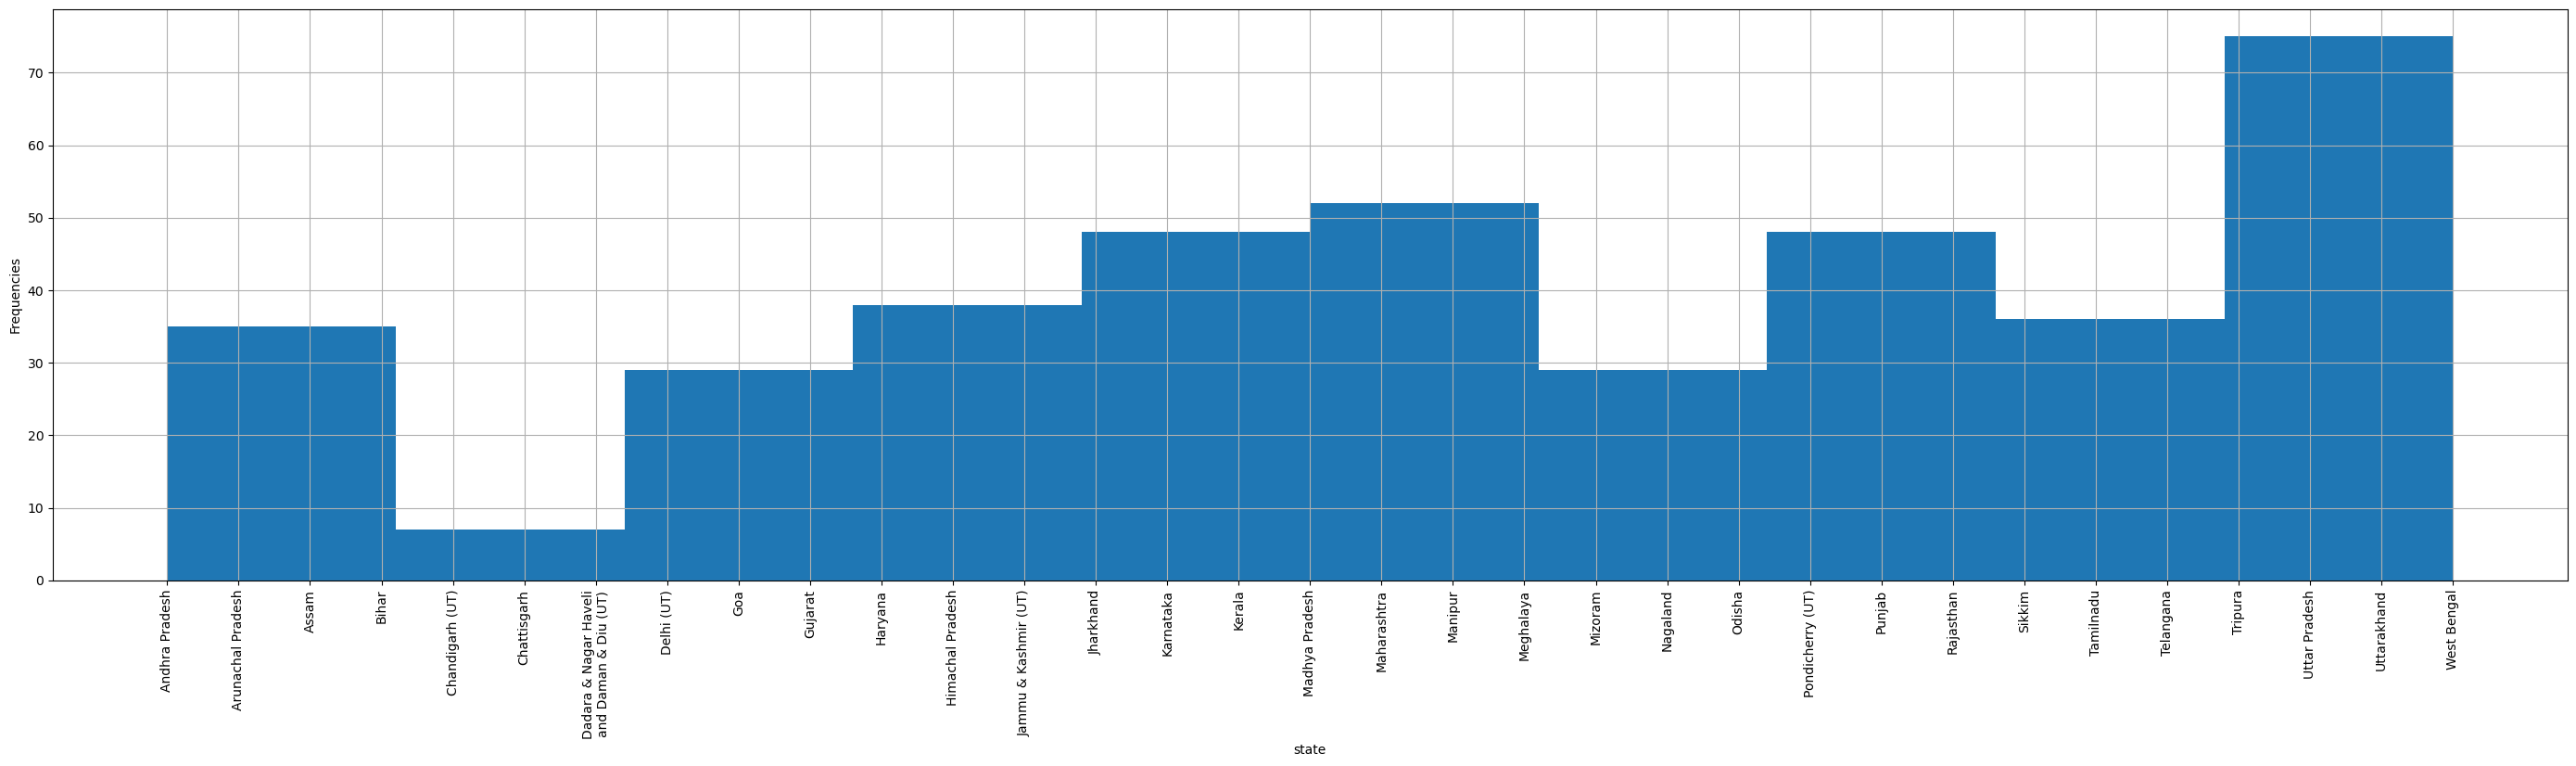

In [14]:
plt.figure(figsize=(35,8))
plt.xticks(rotation=90)
df.State_UT.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()


In [15]:
df1 = data.copy()
df=data.copy()
df1 = df1.astype({"SO2": "float64", "NO2": "float64","PM10": "float64", "PM2.5": "float64"}, errors='ignore')

# Feature Selection and Data Preprocessing

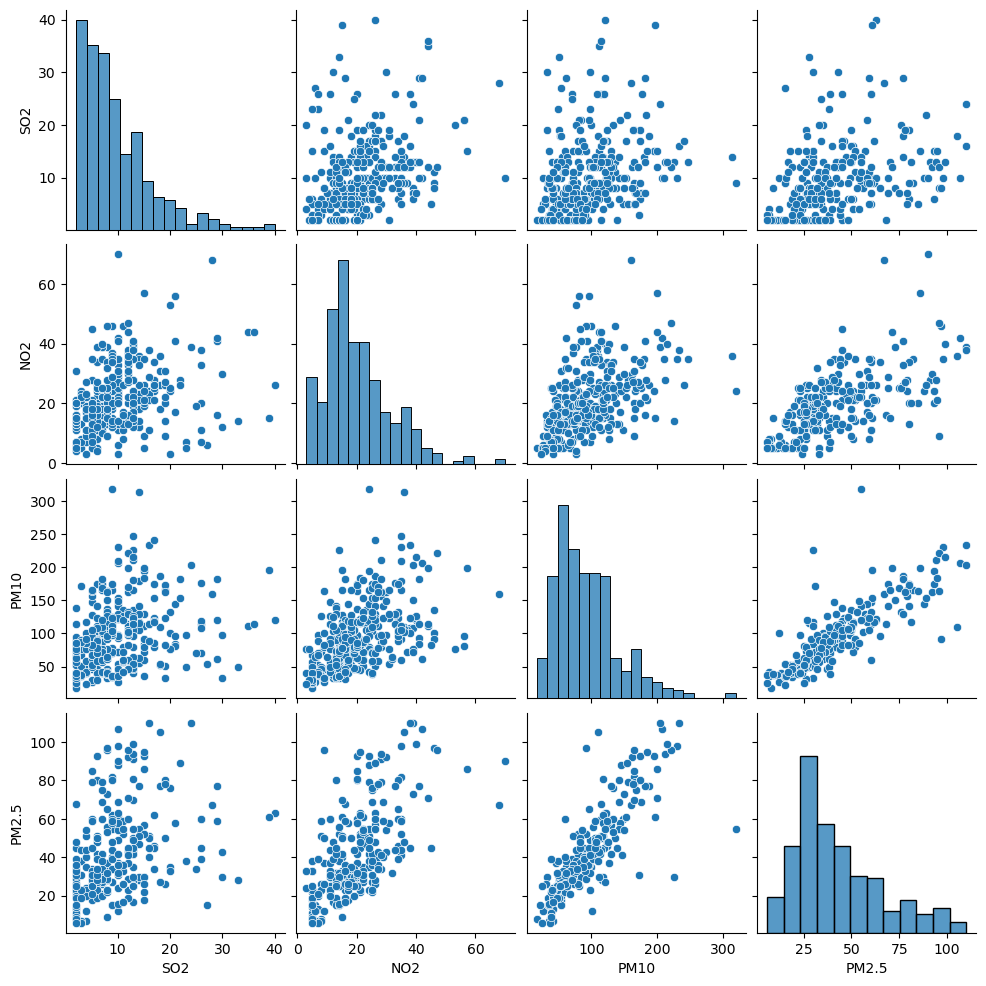

In [16]:
sns.pairplot(data=df1)

<Axes: >

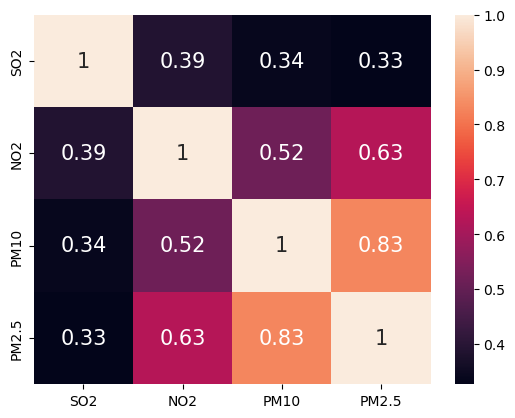

In [17]:
sns.heatmap(df1.corr(),annot=True,annot_kws={'size': 15})

## Correlation Matrix

In [18]:
matrix = df1.corr()
 
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
            SO2       NO2      PM10     PM2.5
SO2    1.000000  0.387701  0.339169  0.326774
NO2    0.387701  1.000000  0.516415  0.626605
PM10   0.339169  0.516415  1.000000  0.831430
PM2.5  0.326774  0.626605  0.831430  1.000000


This Shows that PM2.5 and PM10 has greater correlation and it indicates the presence of mullticollinearity in our dataset as it will lead to dependency among explanatory variables

## This visualization shows the name of the state having higher SO2 levels in the air which is Jharkhand followed by Tripura


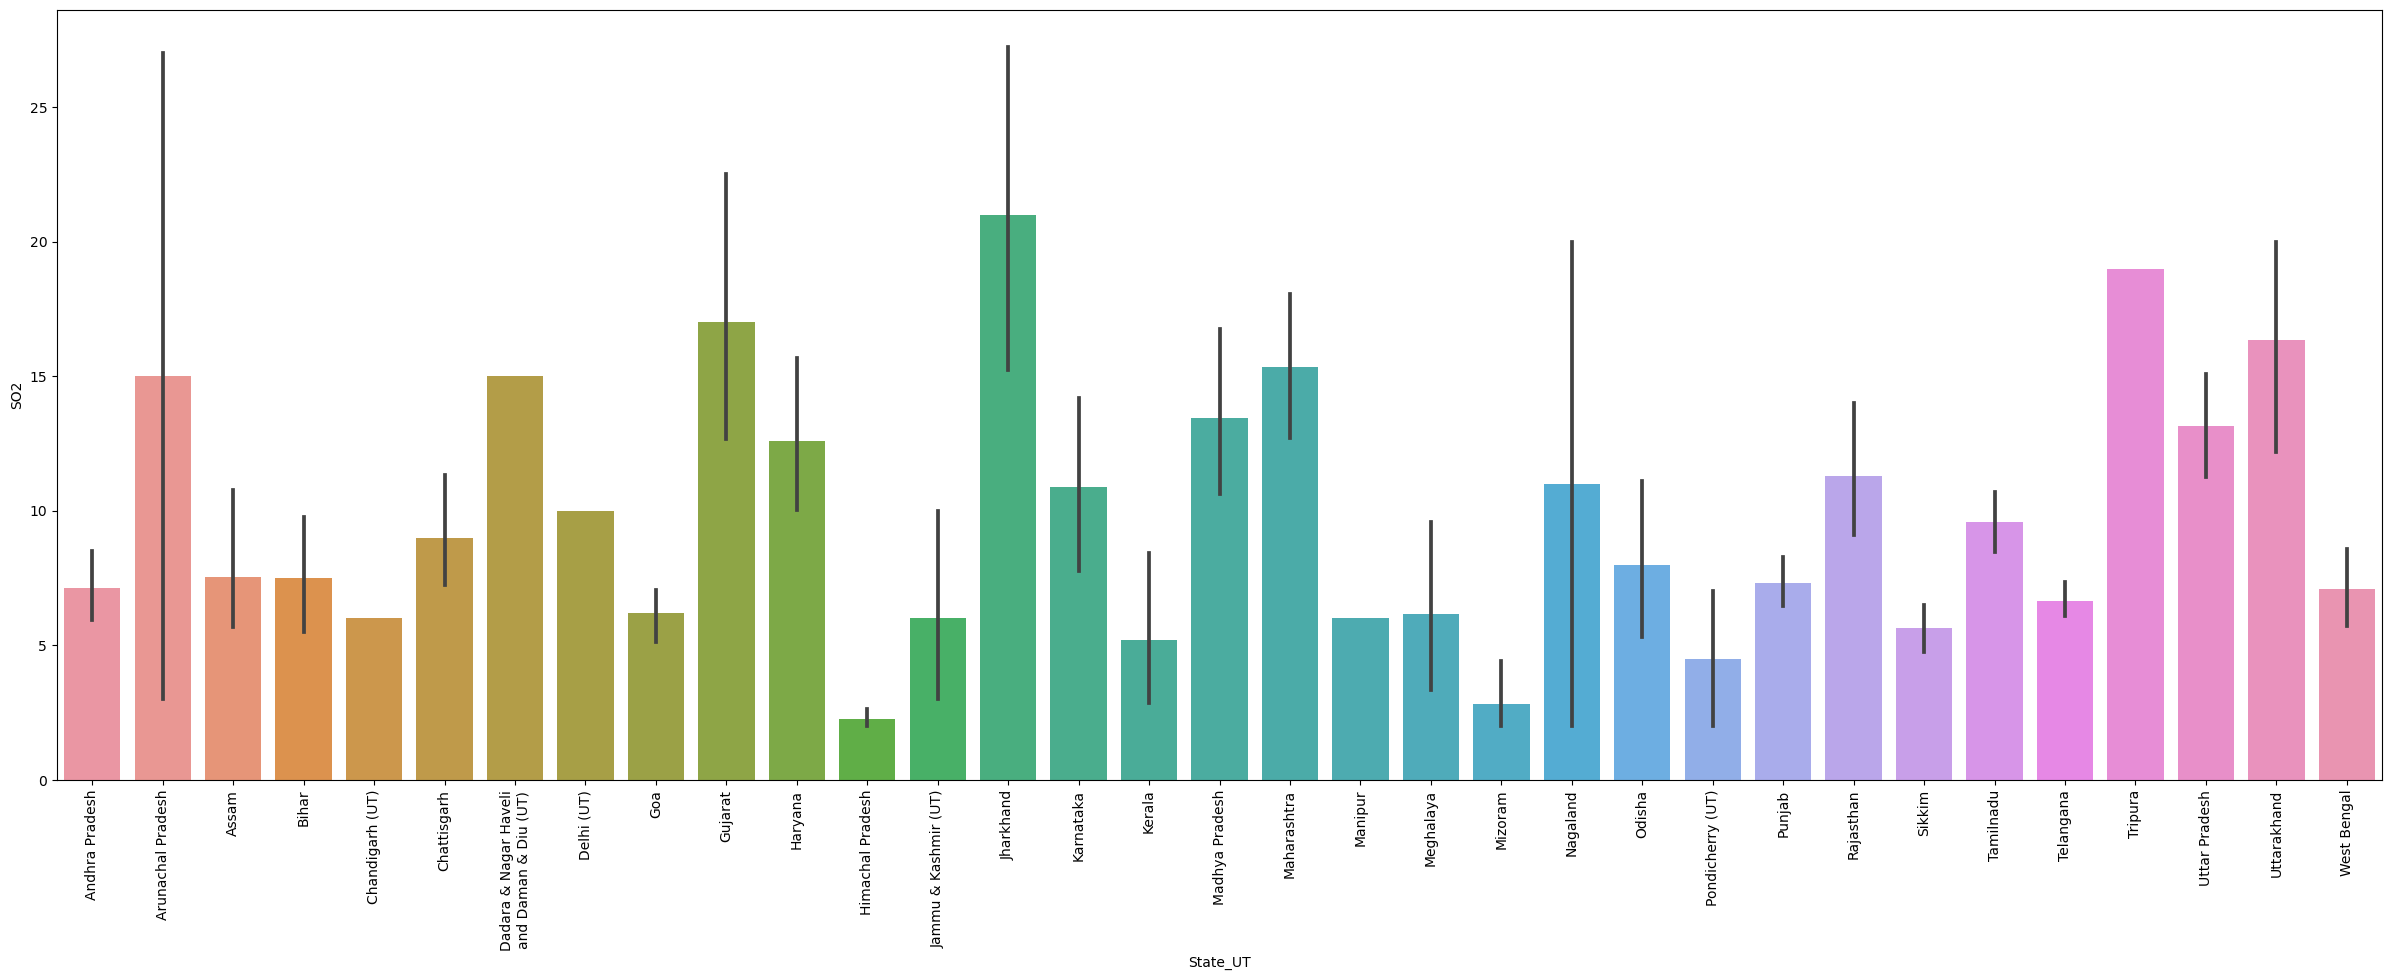

In [19]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='State_UT',y='SO2',data=df1);


In [20]:
plt.rcParams['figure.figsize']=(50,20)

#### We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
#### Below we get a clear picture of the states in an increasing order based on their so2 levels.

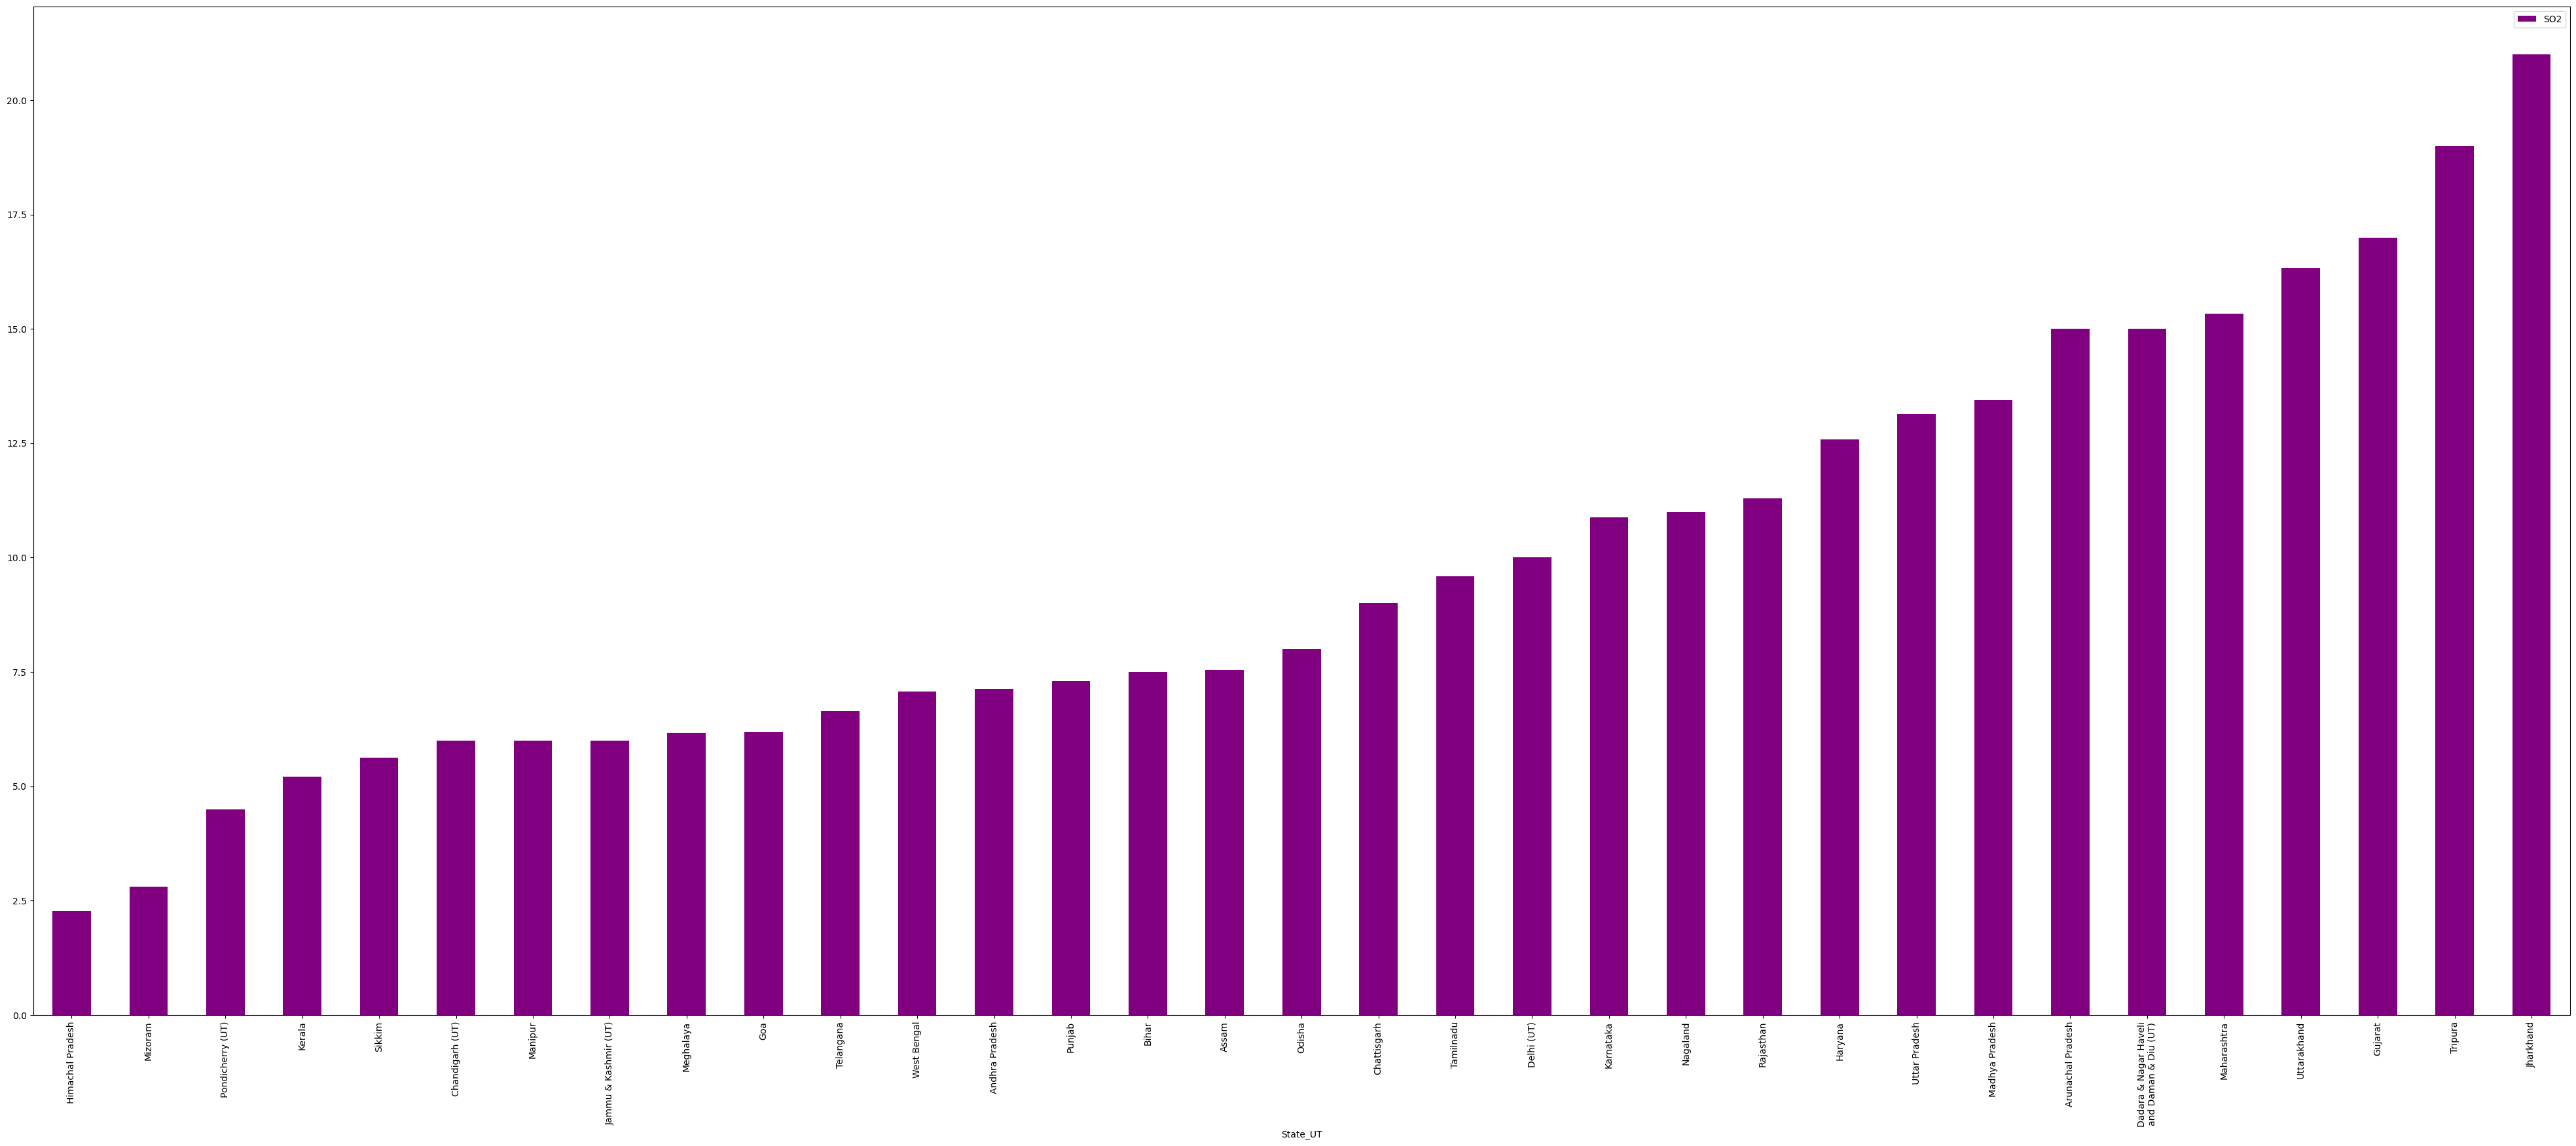

In [21]:
df1[['SO2','State_UT']].groupby(["State_UT"]).mean().sort_values(by='SO2').plot.bar(color='purple')
plt.show()


## This visualization shows the name of the state having higher NO2 levels in the air which is Delhi followed by Telangana

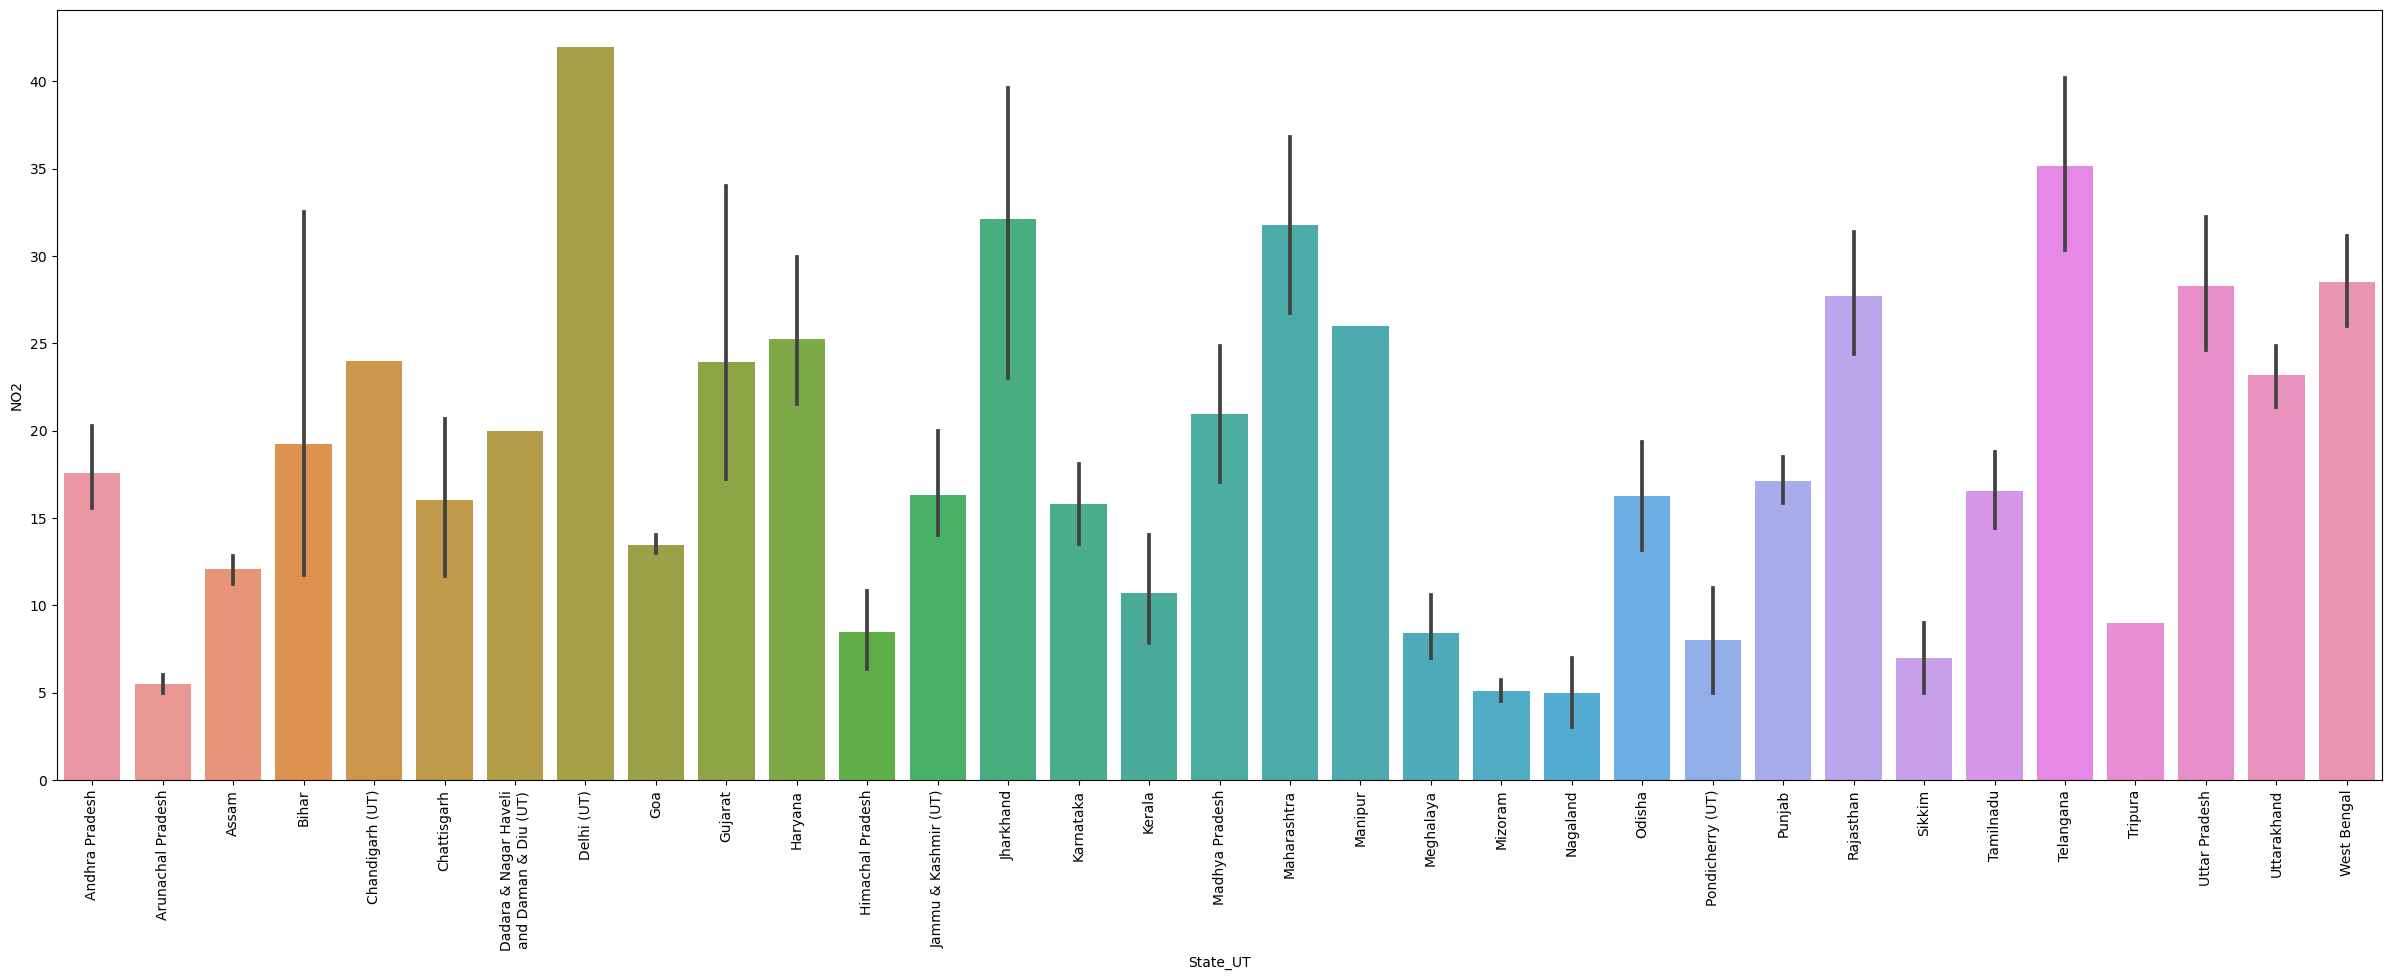

In [22]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='State_UT',y='NO2',data=df1);

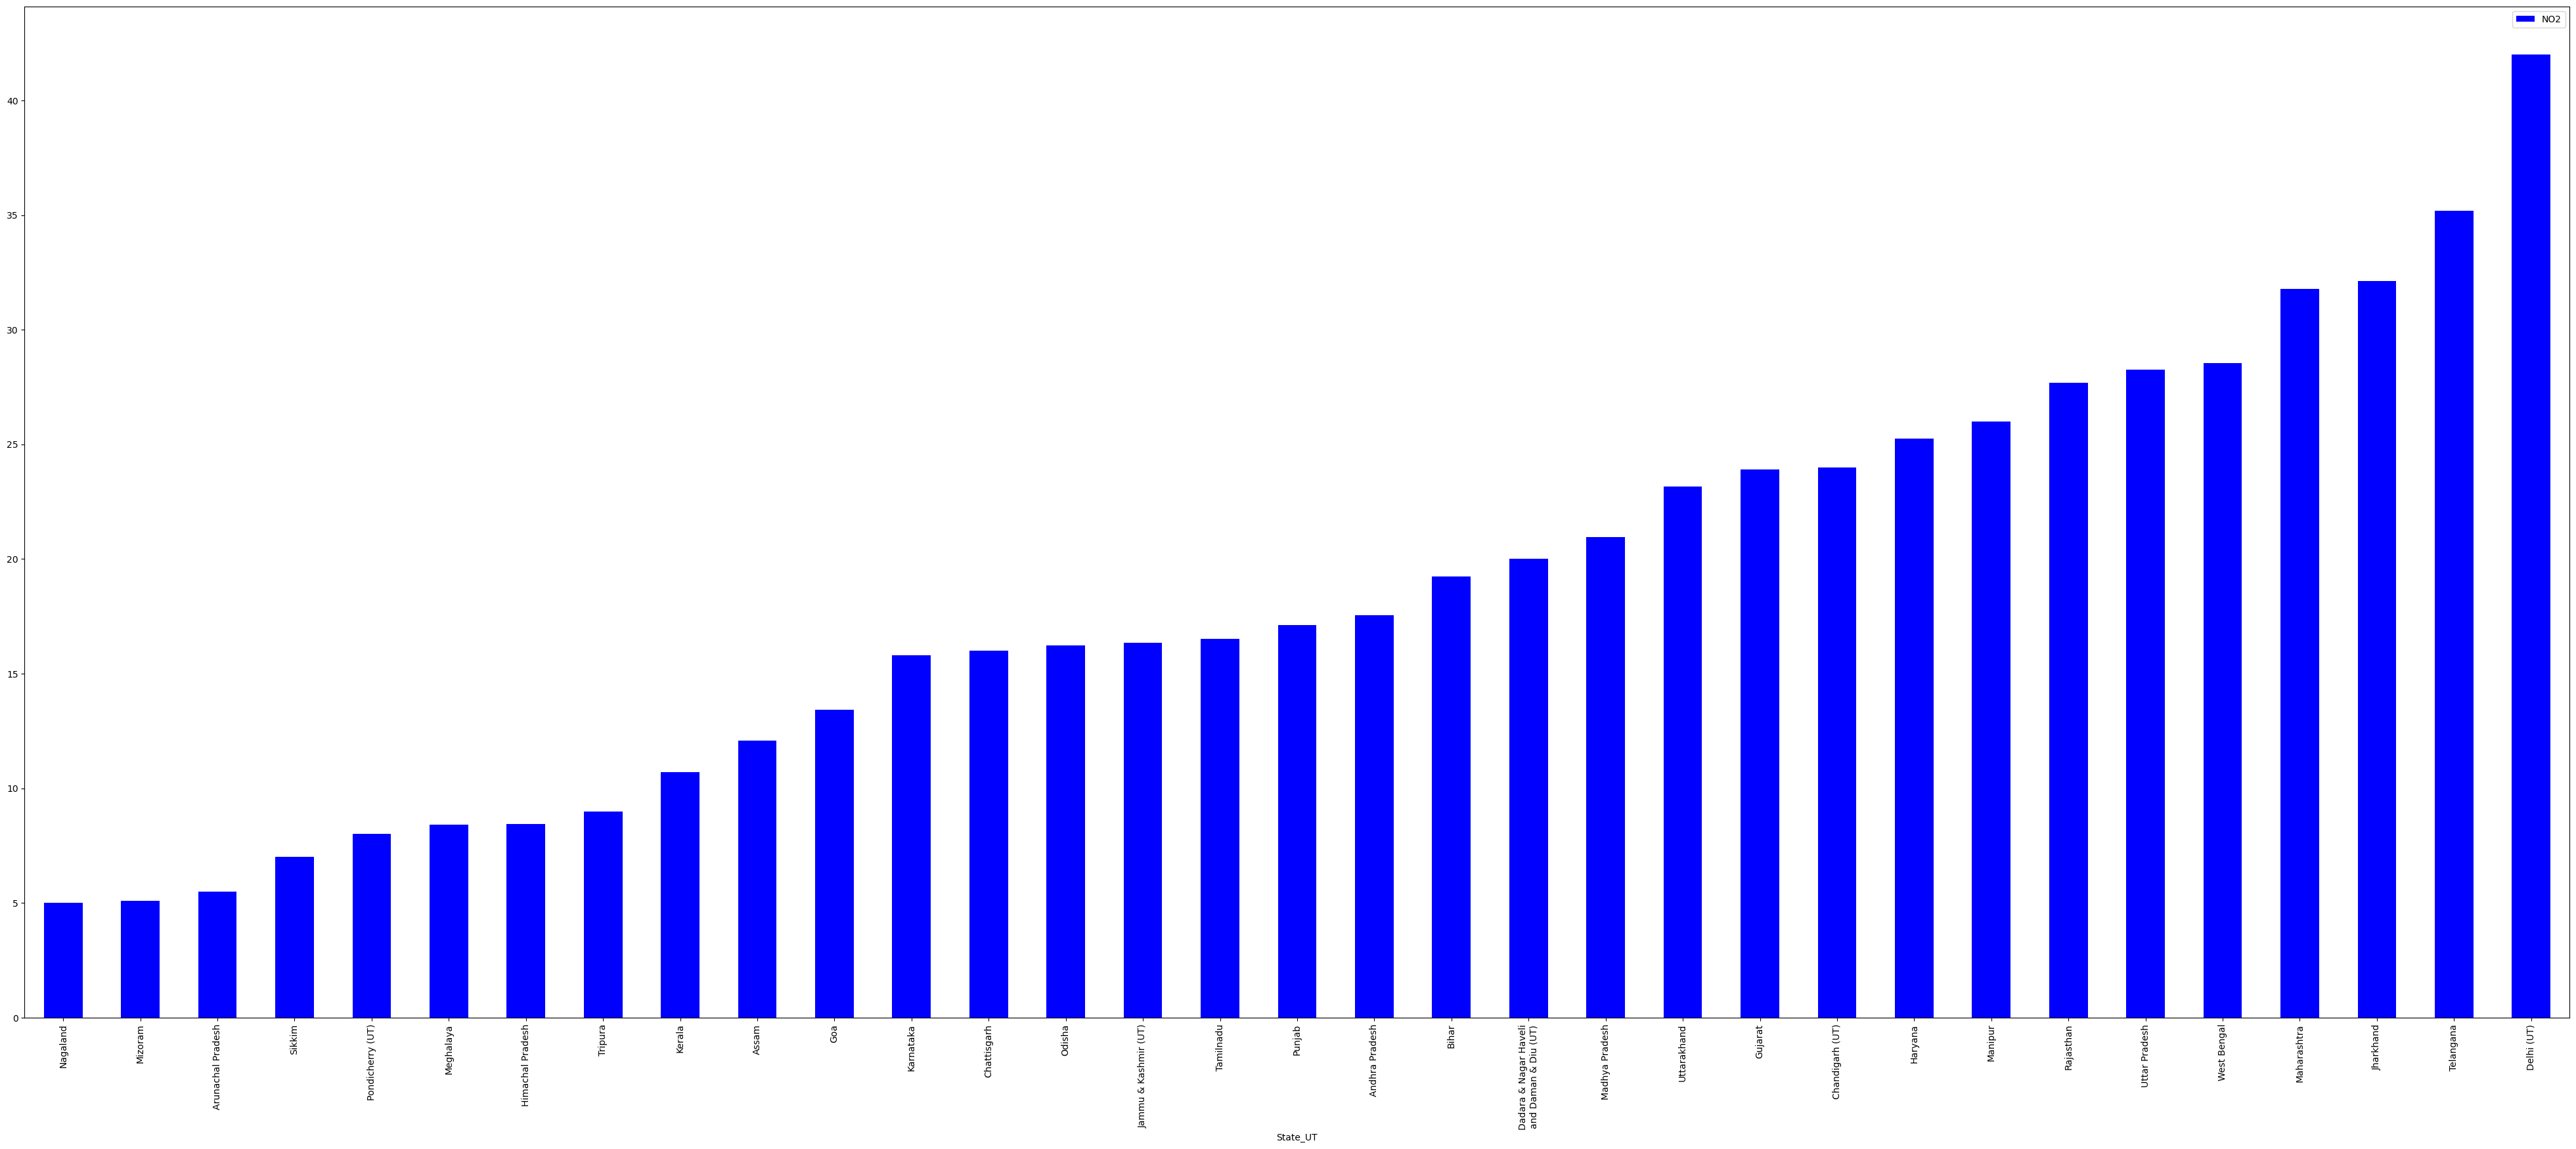

In [23]:
df1[['NO2','State_UT']].groupby(["State_UT"]).mean().sort_values(by='NO2').plot.bar(color='Blue')
plt.show()

## This visualization shows the name of the state having higher PM2.5 levels in the air which is Delhi followed by Jharkhand

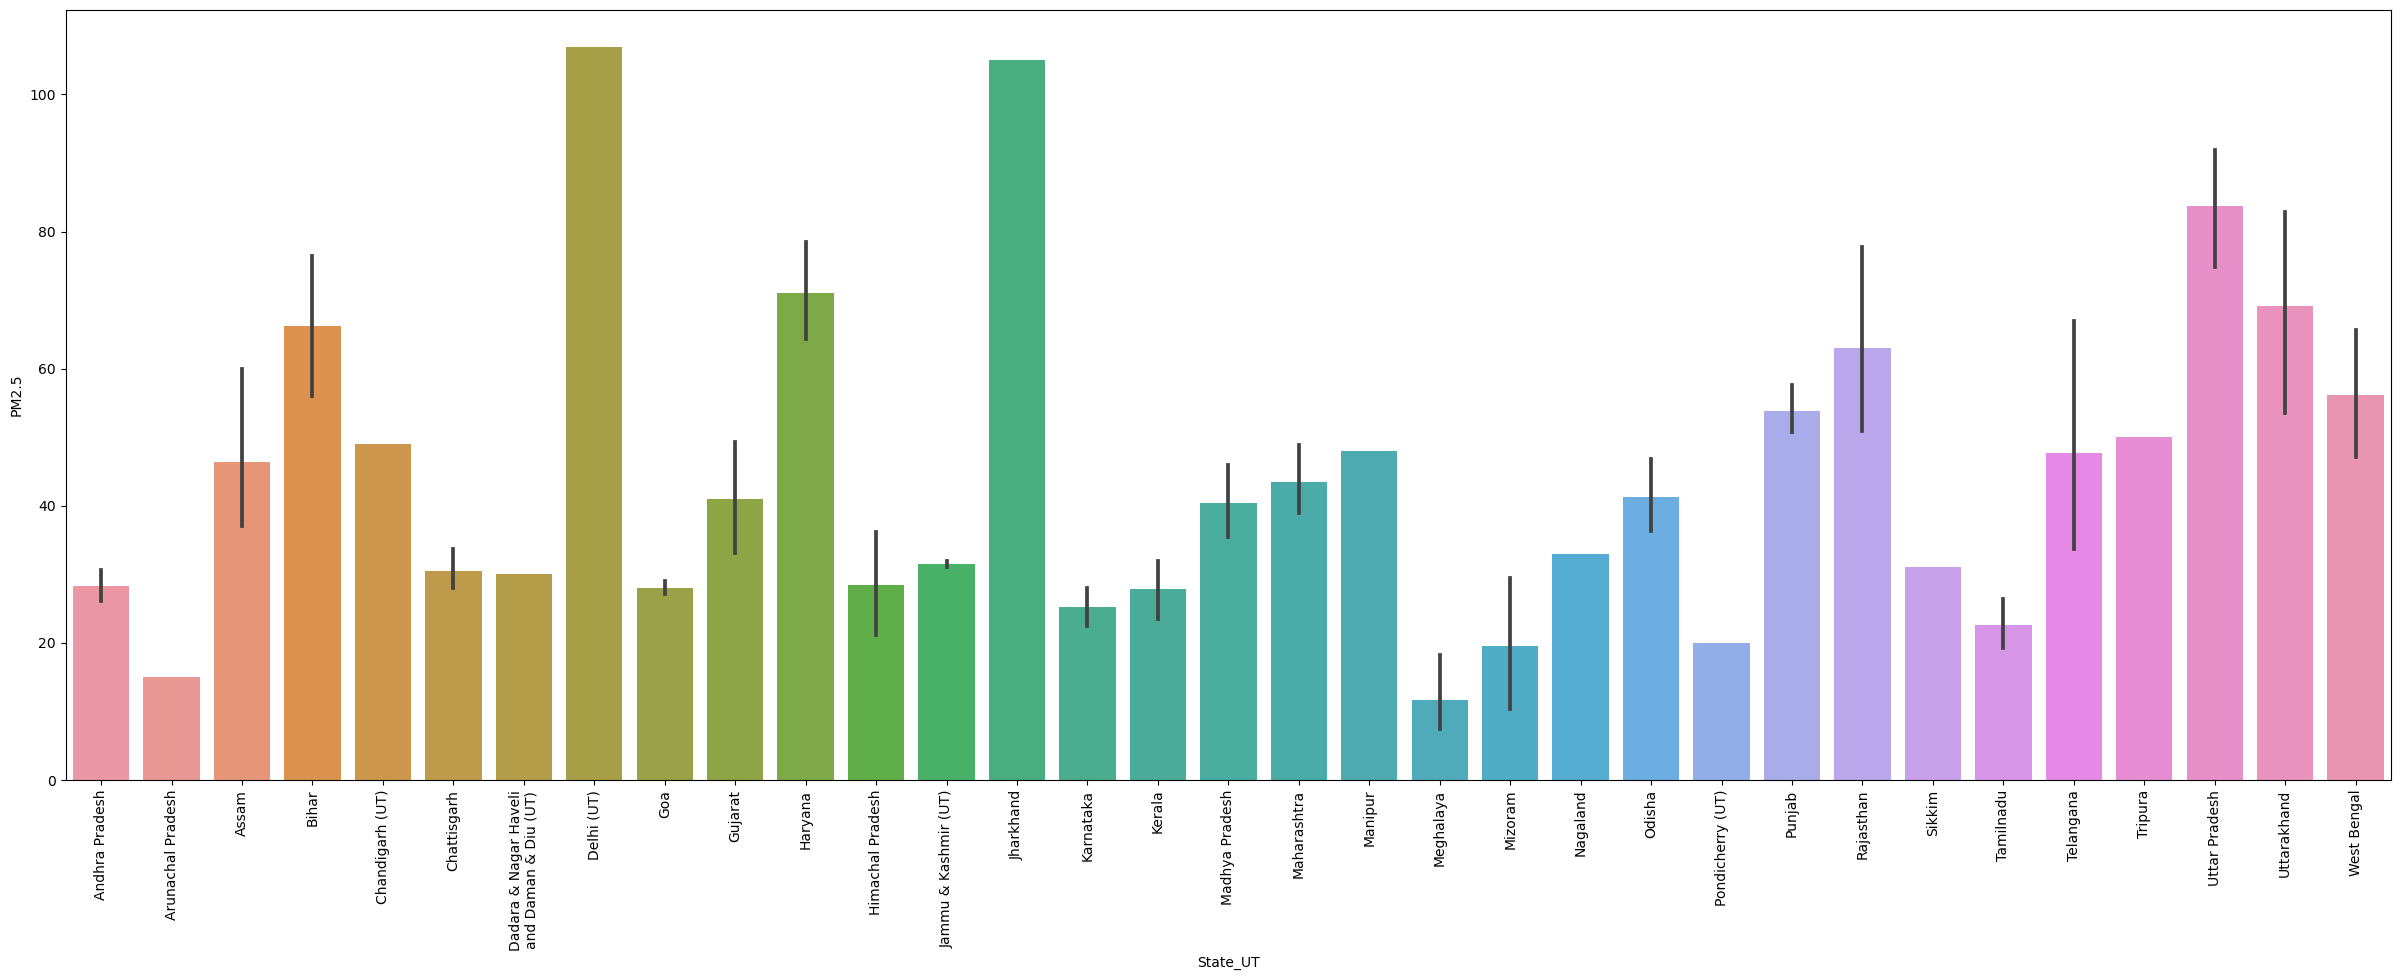

In [24]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='State_UT',y='PM2.5',data=df1);

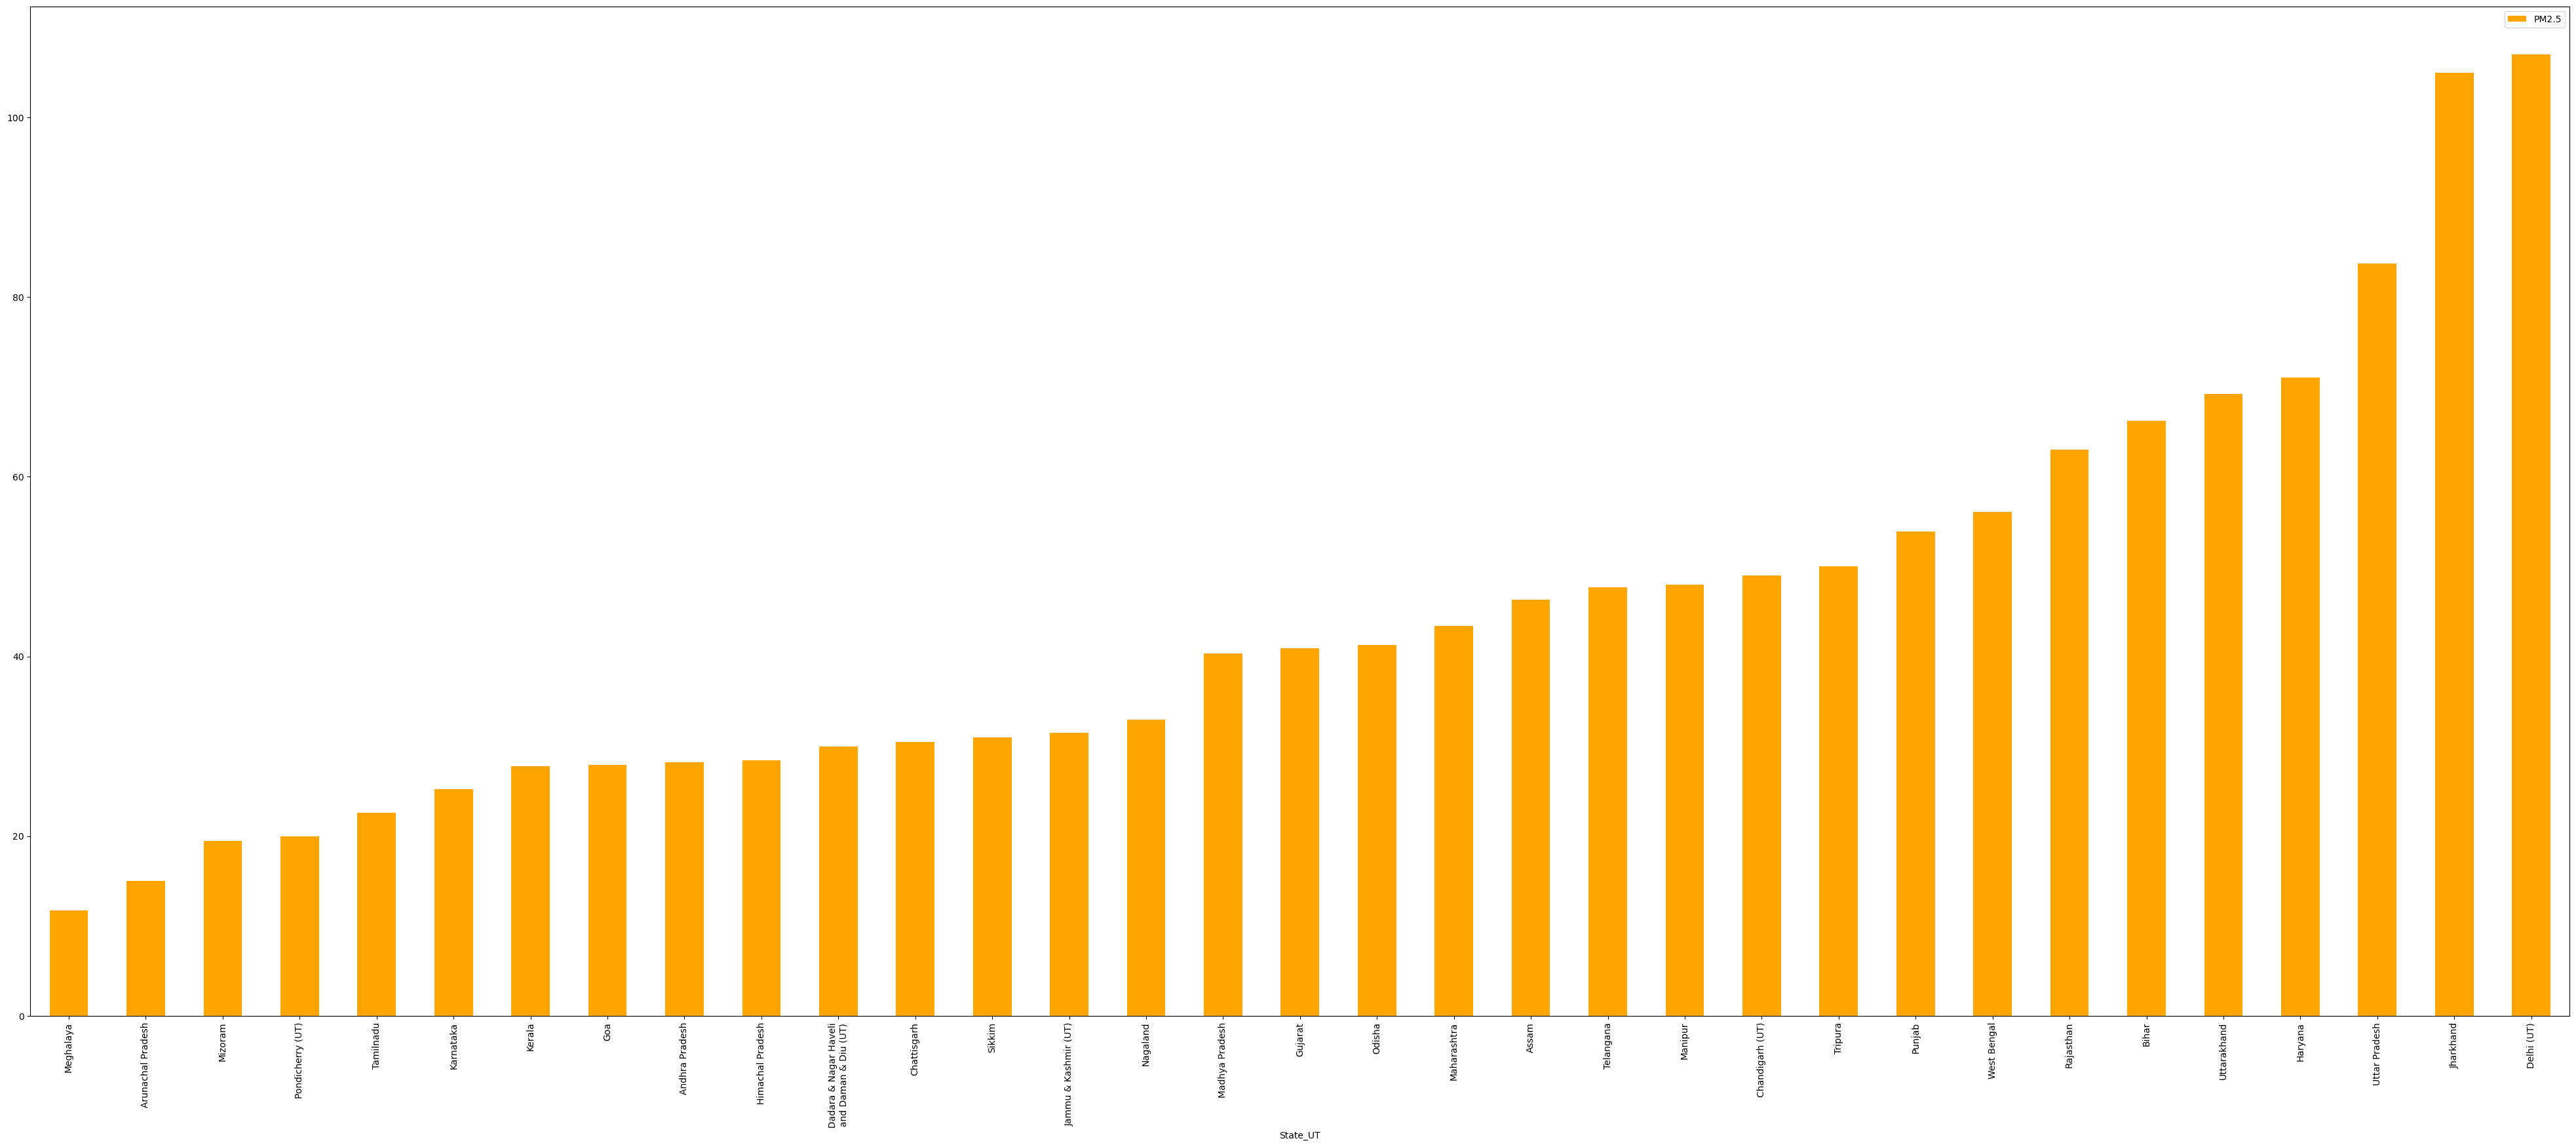

In [25]:
df1[['PM2.5','State_UT']].groupby(["State_UT"]).mean().sort_values(by='PM2.5').plot.bar(color='Orange')
plt.show()

## This visualization shows the name of the state having higher PM10 levels in the air which is Delhi followed by Uttar Pradesh

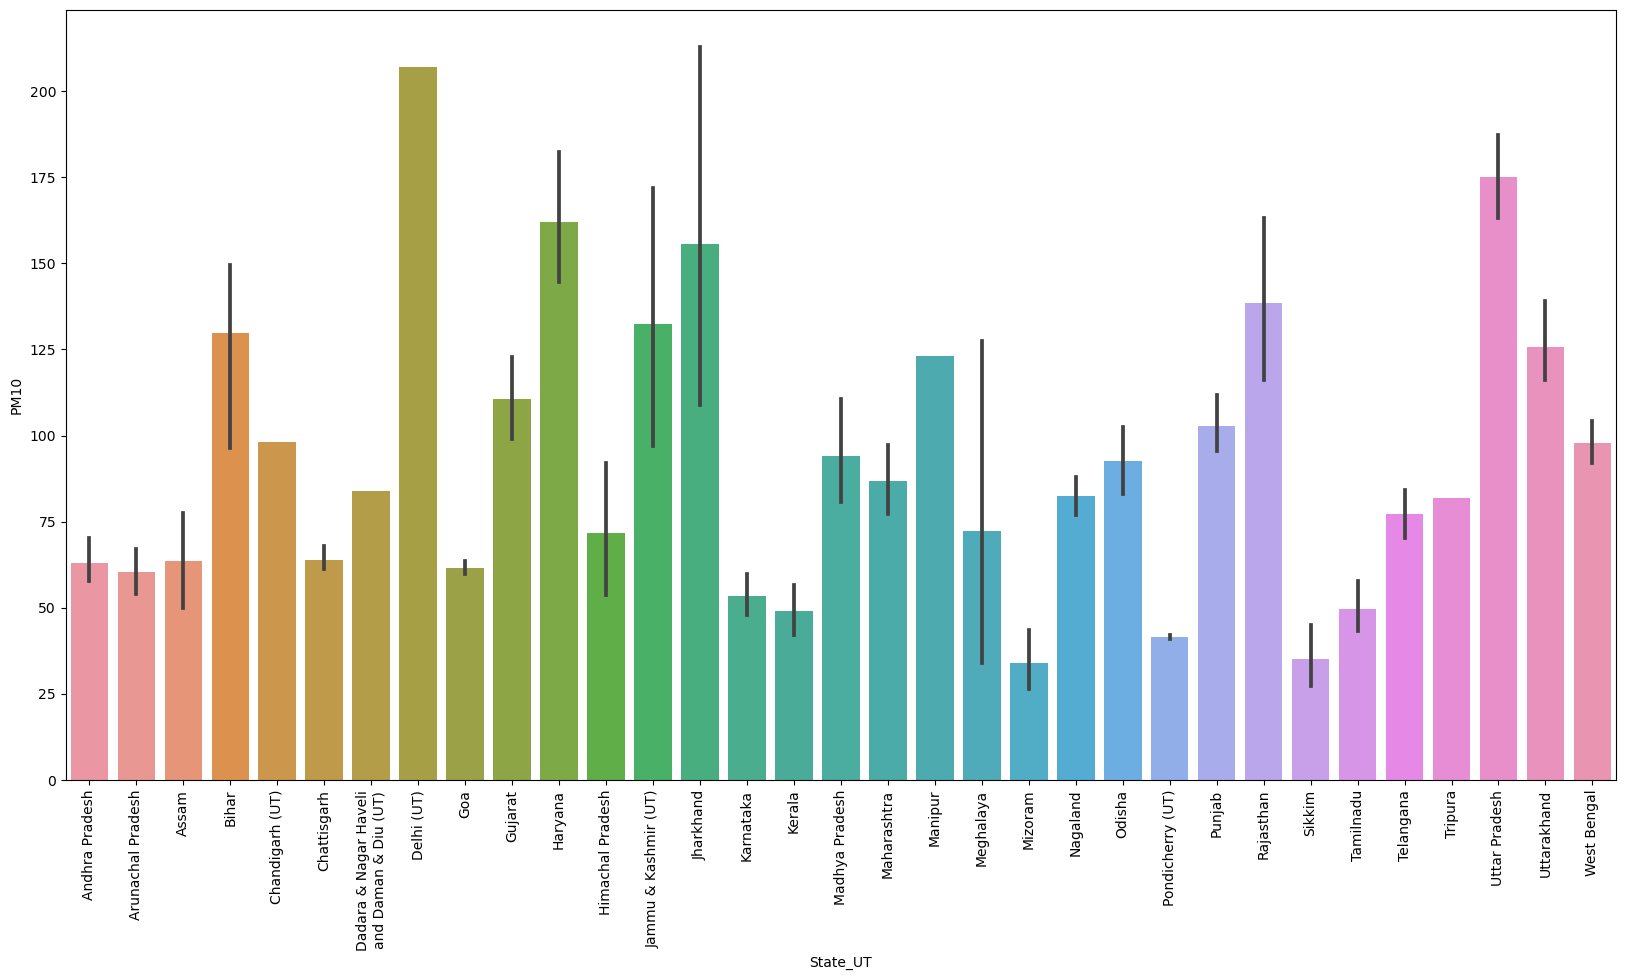

In [26]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
sns.barplot(x='State_UT',y='PM10',data=df1);

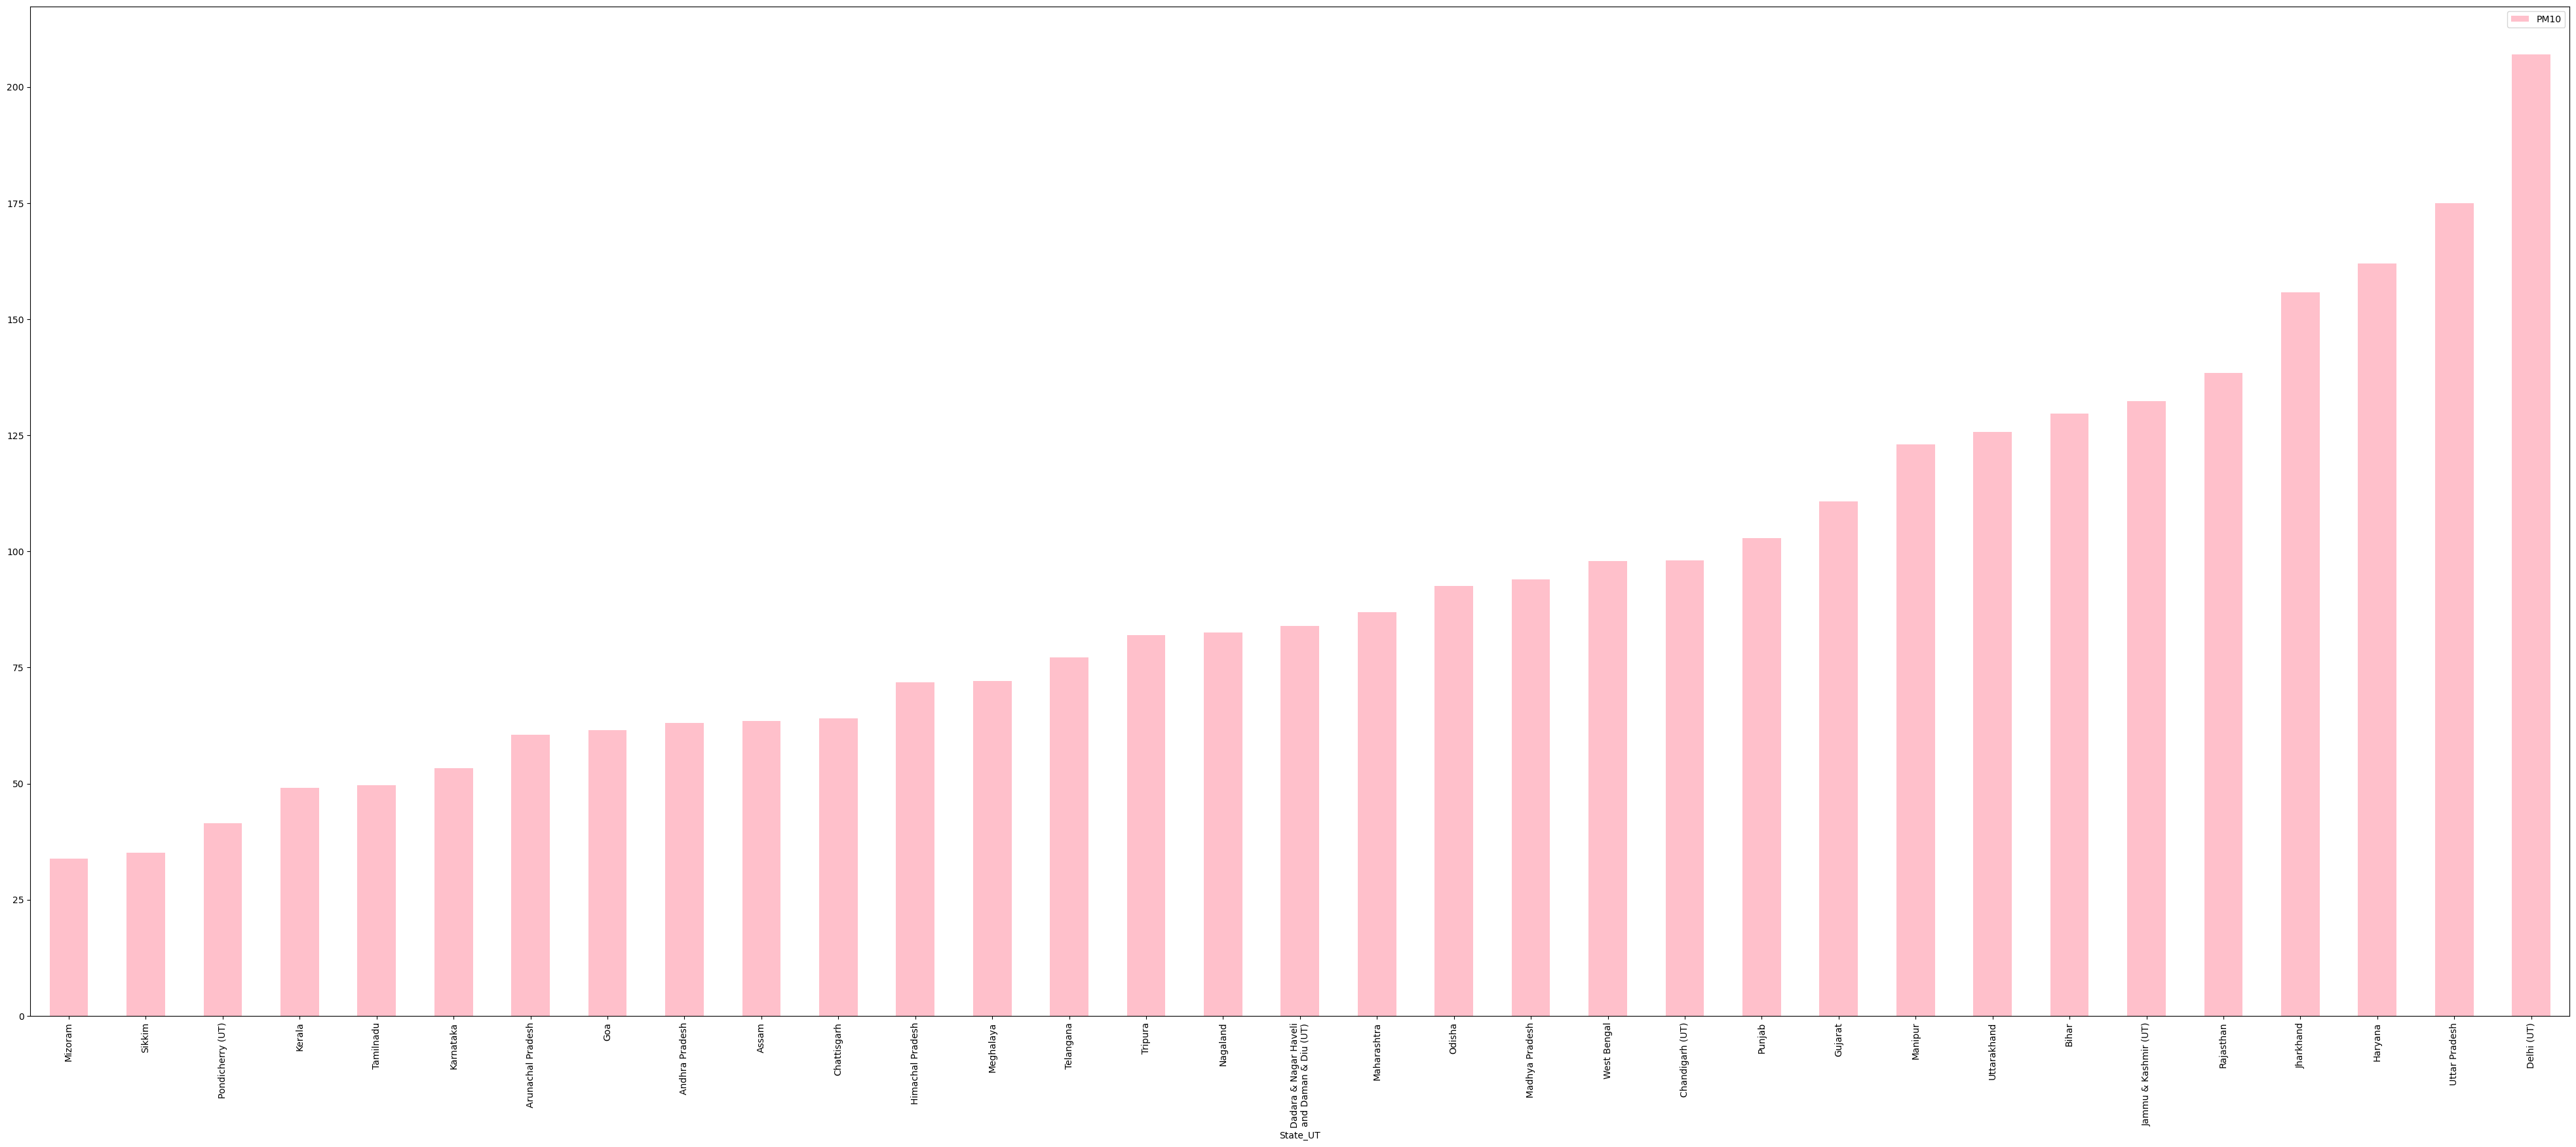

In [27]:
df1[['PM10','State_UT']].groupby(["State_UT"]).mean().sort_values(by='PM10').plot.bar(color='Pink')
plt.show()

# Checking all null values and treating those null values.

In [28]:
nullvalues = df1.isnull().sum().sort_values(ascending=False)

In [29]:
nullvalues

PM2.5       134
SO2           7
PM10          6
NO2           5
State_UT      0
City          0
dtype: int64

<Axes: >

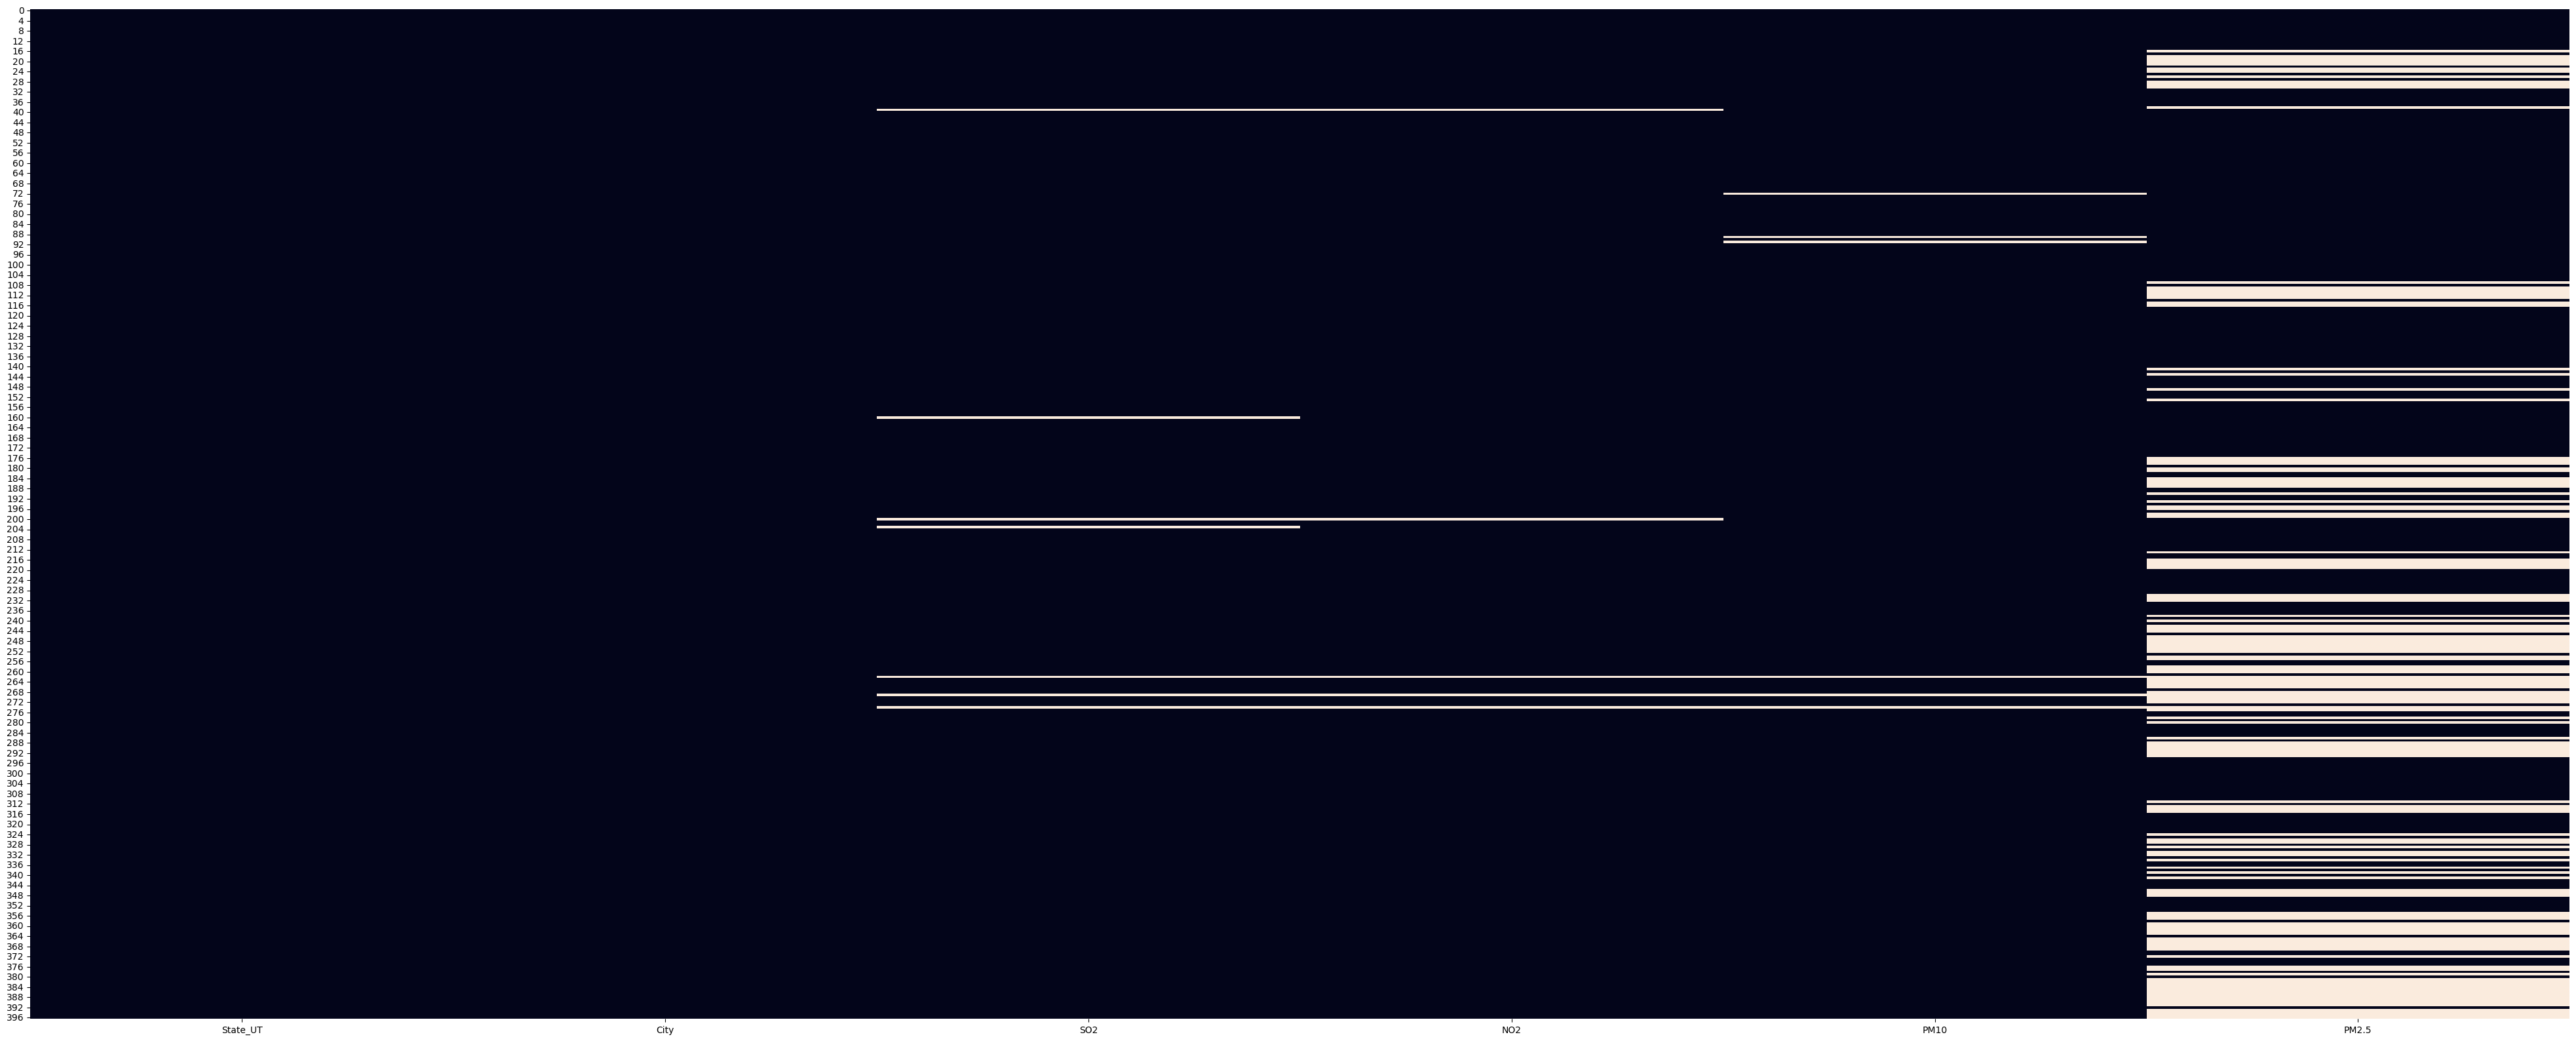

In [30]:
sns.heatmap(df1.isnull(), cbar=False)

In [31]:
null_values_percentage = ((df1.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

In [32]:
null_values_percentage

PM2.5       33.753149
SO2          1.763224
PM10         1.511335
NO2          1.259446
State_UT     0.000000
City         0.000000
dtype: float64

### Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [33]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])


In [34]:
missing_data_with_percentage


,Total,Percent
PM2.5,134,33.753149
SO2,7,1.763224
PM10,6,1.511335
NO2,5,1.259446
State_UT,0,0.000000
City,0,0.000000


Since we already know that our dataset contains missing values , and we need to fill them for our further analysis . We will be using Imputation to fill inour missing values. Imputation is the process of replacing missing data with substituted values . Because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values.

In [35]:
by_State=df.groupby('State_UT')

def impute_mean(series):
    return series.fillna(series.mean())
df['PM2.5']=by_State['PM2.5'].transform(impute_mean)

In [36]:
df.fillna(0, inplace=True)

In [37]:
df.isnull().sum()

State_UT    0
City        0
SO2         0
NO2         0
PM10        0
PM2.5       0
dtype: int64

In [38]:
df.groupby('State_UT')[['PM2.5','PM10','SO2','NO2']].mean()

,PM2.5,PM10,SO2,NO2
State_UT,,,,
Andhra Pradesh,28.250000,63.000000,7.125000,17.562500
Arunachal Pradesh,15.000000,60.500000,15.000000,5.500000
Assam,46.333333,63.461538,7.538462,12.076923
Bihar,66.250000,129.750000,7.500000,19.250000
Chandigarh (UT),49.000000,98.000000,6.000000,24.000000
Chattisgarh,30.500000,64.000000,7.200000,12.800000
Dadara & Nagar Haveli\nand Daman & Diu (UT),30.000000,84.000000,15.000000,20.000000
Delhi (UT),107.000000,207.000000,10.000000,42.000000
Goa,27.937500,61.562500,6.187500,13.437500


Understanding the pollutants briefly .
NO2: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

SO2: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

spm: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

rspm: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.
 
pm10: it is considered as spm as it has diameter less than 10 micrometer potentially more harmful than pm2.5

pm2_5: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.

### CALCULATE AIR QUALITY INDEX  BASED ON FORMULA
### The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

Derivation for Individual Pollutant Index and AQI
The AQI is an index for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air. EPA calculates the AQI for five major air pollutants regulated by the Clean Air Act: groundlevel ozone, particle pollution Air quality directly affects (also known as particulate our quality of life. matter), carbon monoxide, sulfur dioxide, and nitrogen dioxide. For each of these pollutants, EPA has established national air quality standards to protect public health.

AQI is calculated on the range of 0-500, we are scaling the values according to the AQI calculation formula
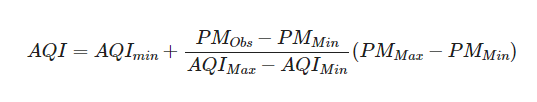

 


# Function to calculate SO2 individual pollutant index(si)

In [39]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['SO2'].apply(cal_SOi)
data= df[['SO2','SOi']]
data.head()

,SO2,SOi
0,14.0,17.50
1,7.0,8.75
2,5.0,6.25
3,5.0,6.25
4,5.0,6.25


# Function to calculate NO2 individual pollutant index(Noi)

In [40]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['NO2'].apply(cal_Noi)
data= df[['NO2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,NO2,Noi
0,12.0,15.00
1,16.0,20.00
2,14.0,17.50
3,17.0,21.25
4,17.0,21.25


# Function to calculate rspm individual pollutant index(rpi)

In [41]:


## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["Rpi"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))
data= df[['PM2.5','Rpi']]
data.head()

,PM2.5,Rpi
0,28.0,46.666667
1,30.0,50.000000
2,25.0,41.666667
3,30.0,50.000000
4,29.0,48.333333


# Function to calculate spm (PM10) individual pollutant index(SPMi)

In [42]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
   
df['SPMi']=df['PM10'].apply(cal_SPMi)
data= df[['PM10','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,PM10,SPMi
0,55.0,55.0
1,64.0,64.0
2,46.0,46.0
3,63.0,63.0
4,60.0,60.0


# Function to calculate the air quality index (AQI) of every data value

In [43]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['State_UT','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

# Caluclating the Air Quality Index.

,State_UT,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,17.50,15.00,46.666667,55.0,55.0
1,Andhra Pradesh,8.75,20.00,50.000000,64.0,64.0
2,Andhra Pradesh,6.25,17.50,41.666667,46.0,46.0
3,Andhra Pradesh,6.25,21.25,50.000000,63.0,63.0
4,Andhra Pradesh,6.25,21.25,48.333333,60.0,60.0


# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

In [44]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,State_UT,City,SO2,NO2,PM10,PM2.5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Amaravati,14.0,12.0,55.0,28.0,17.50,15.00,46.666667,55.0,55.0,Moderate
1,Andhra Pradesh,Anatapur,7.0,16.0,64.0,30.0,8.75,20.00,50.000000,64.0,64.0,Moderate
2,Andhra Pradesh,Chittor,5.0,14.0,46.0,25.0,6.25,17.50,41.666667,46.0,46.0,Good
3,Andhra Pradesh,Eluru,5.0,17.0,63.0,30.0,6.25,21.25,50.000000,63.0,63.0,Moderate
4,Andhra Pradesh,Guntur,5.0,17.0,60.0,29.0,6.25,21.25,48.333333,60.0,60.0,Moderate


In [45]:
#df.to_csv('C:/Users/Palak Goel/Desktop/AQI/AQI_output1.csv')

In [46]:
#df_final=df.groupby('State_UT')[['PM2.5','PM10','SO2','NO2','AQI']].mean()

In [47]:
#df_final.to_csv('C:/Users/Palak Goel/Desktop/AQI/AQI_output3.csv')

In [48]:
dataframe = pd.DataFrame(df, columns=['SO2', 'NO2', 'PM10', 'PM2.5', 'AQI'])

In [49]:
#Exploring air pollution state-wise

states=df.groupby(['State_UT','City'],as_index=False).mean()
state=states.groupby(['State_UT'],as_index=False).mean()
state

,State_UT,SO2,NO2,PM10,PM2.5,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,7.125000,17.562500,63.000000,28.250000,8.906250,21.953125,47.083333,62.937500,62.937500
1,Arunachal Pradesh,15.000000,5.500000,60.500000,15.000000,18.750000,6.875000,25.000000,60.500000,60.500000
2,Assam,7.538462,12.076923,63.461538,46.333333,9.423077,15.096154,77.222222,63.076923,82.957265
3,Bihar,7.500000,19.250000,129.750000,66.250000,9.375000,24.062500,124.166667,118.083333,132.166667
4,Chandigarh (UT),6.000000,24.000000,98.000000,49.000000,7.500000,30.000000,81.666667,98.000000,98.000000
5,Chattisgarh,7.200000,12.800000,64.000000,30.500000,9.000000,16.000000,50.833333,64.000000,64.000000
6,Dadara & Nagar Haveli\nand Daman & Diu (UT),15.000000,20.000000,84.000000,30.000000,18.750000,25.000000,50.000000,84.000000,84.000000
7,Delhi (UT),10.000000,42.000000,207.000000,107.000000,12.500000,52.500000,256.666667,171.333333,256.666667
8,Goa,6.187500,13.437500,61.562500,27.937500,7.734375,16.796875,46.562500,61.562500,61.562500
9,Gujarat,17.000000,23.916667,110.750000,40.916667,21.250000,29.895833,69.583333,105.694444,106.777778


<Axes: >

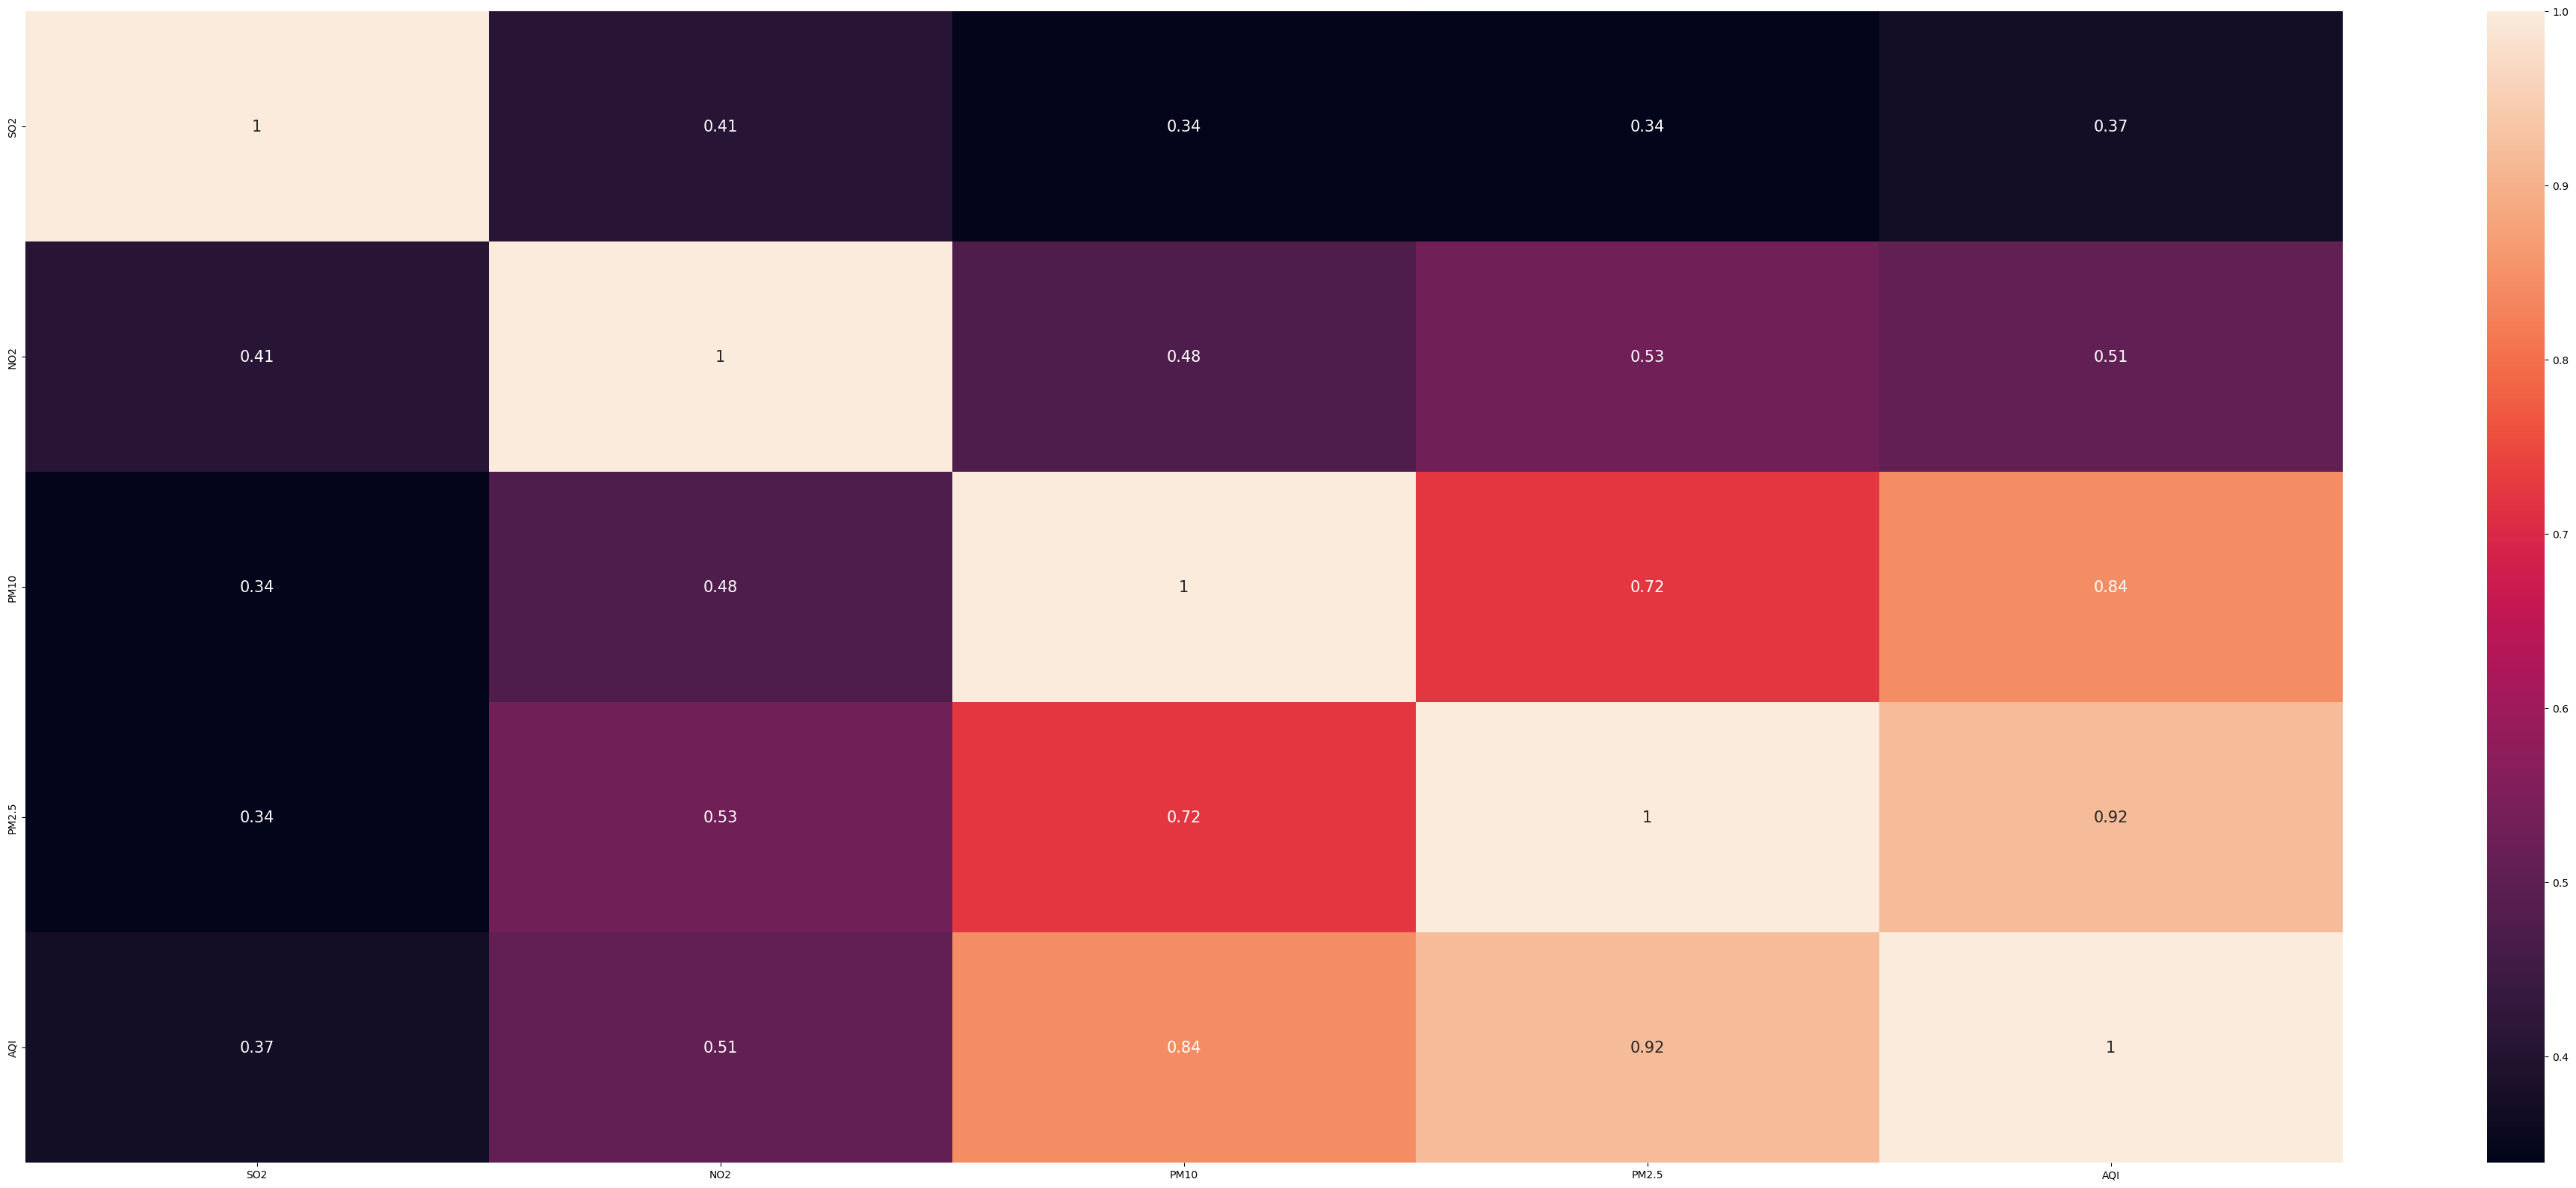

In [50]:
sns.heatmap(dataframe.corr(),annot=True,annot_kws={'size': 15})

# Finding the correlation between explanatory variable and explained variable i.e AQI 

In [51]:
matrix = dataframe.corr()
 
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
            SO2       NO2      PM10     PM2.5       AQI
SO2    1.000000  0.410093  0.343916  0.339110  0.370536
NO2    0.410093  1.000000  0.475365  0.529773  0.506683
PM10   0.343916  0.475365  1.000000  0.722738  0.842580
PM2.5  0.339110  0.529773  0.722738  1.000000  0.917643
AQI    0.370536  0.506683  0.842580  0.917643  1.000000


### This shows that PM10 and AQI has high Correlation followed by N02 and AQI

# Checking Skewness

In [52]:
dataframe.skew(axis = 0, skipna = True)

SO2      1.499379
NO2      1.006760
PM10     1.129347
PM2.5    0.773555
AQI      1.312403
dtype: float64

# Swarm Plot of AQI Range

<Axes: xlabel='AQI_Range', ylabel='AQI'>

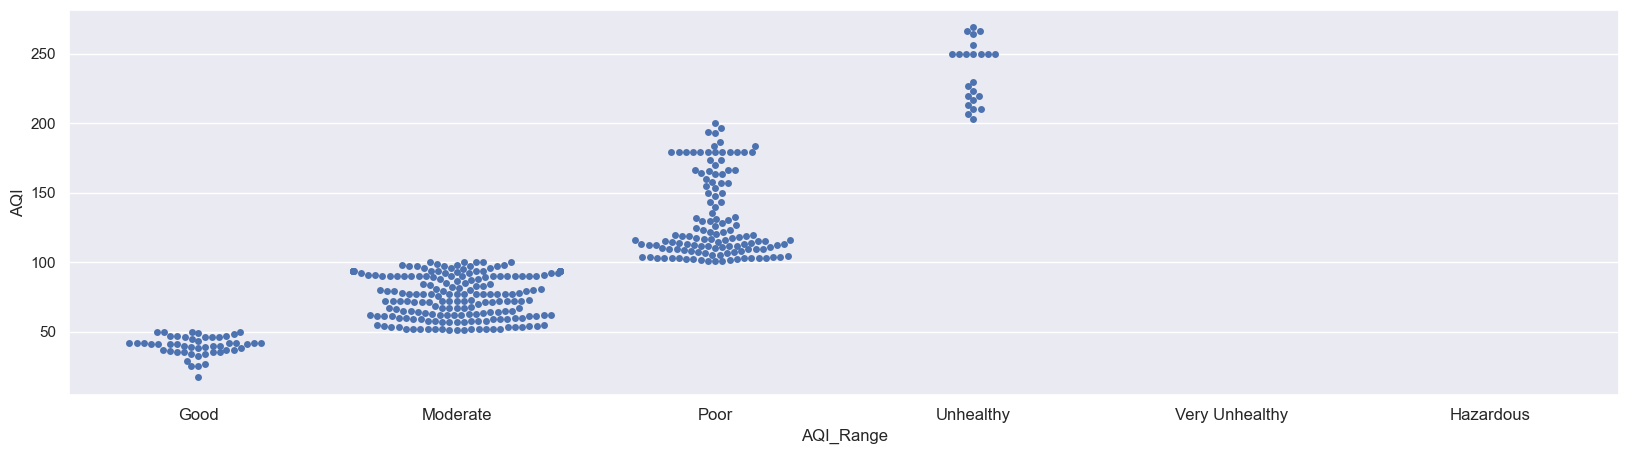

In [53]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
df['AQI']=pd.to_numeric(df['AQI'])
sns.swarmplot(data=df,x='AQI_Range',y='AQI',order=['Good', 'Moderate', 'Poor', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])

# Box Plot of AQI Range

<Axes: xlabel='AQI_Range', ylabel='AQI'>

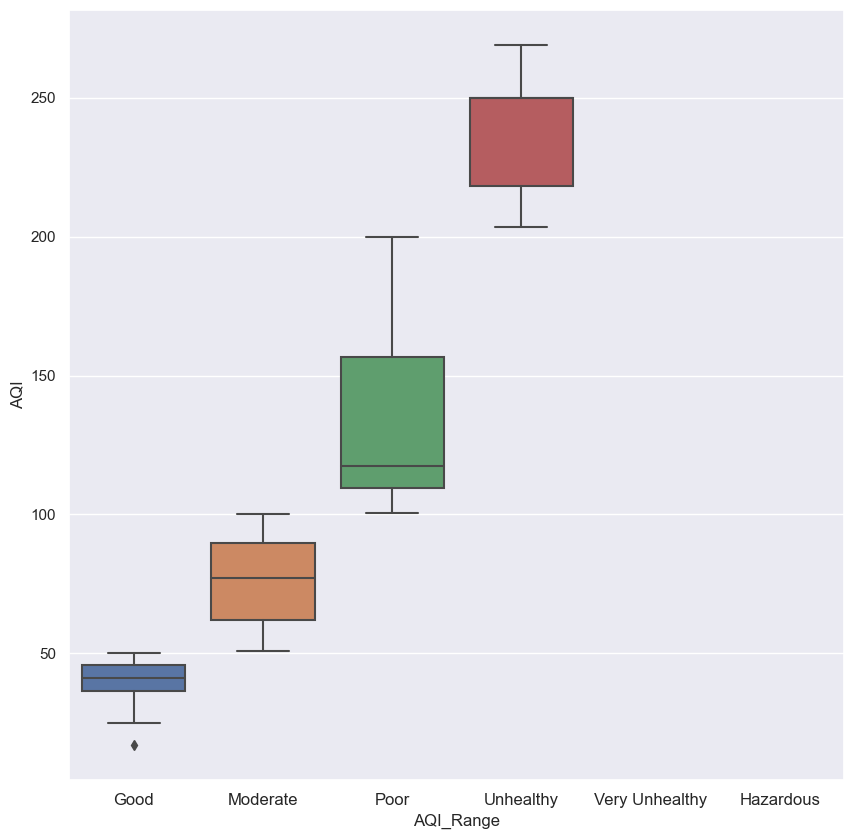

In [54]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(fontsize=12)
df['AQI']=pd.to_numeric(df['AQI'])
sns.boxplot(data=df,x='AQI_Range',y='AQI',order=['Good', 'Moderate', 'Poor', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])


# Violin plot of AQI Range

<Axes: xlabel='AQI_Range', ylabel='AQI'>

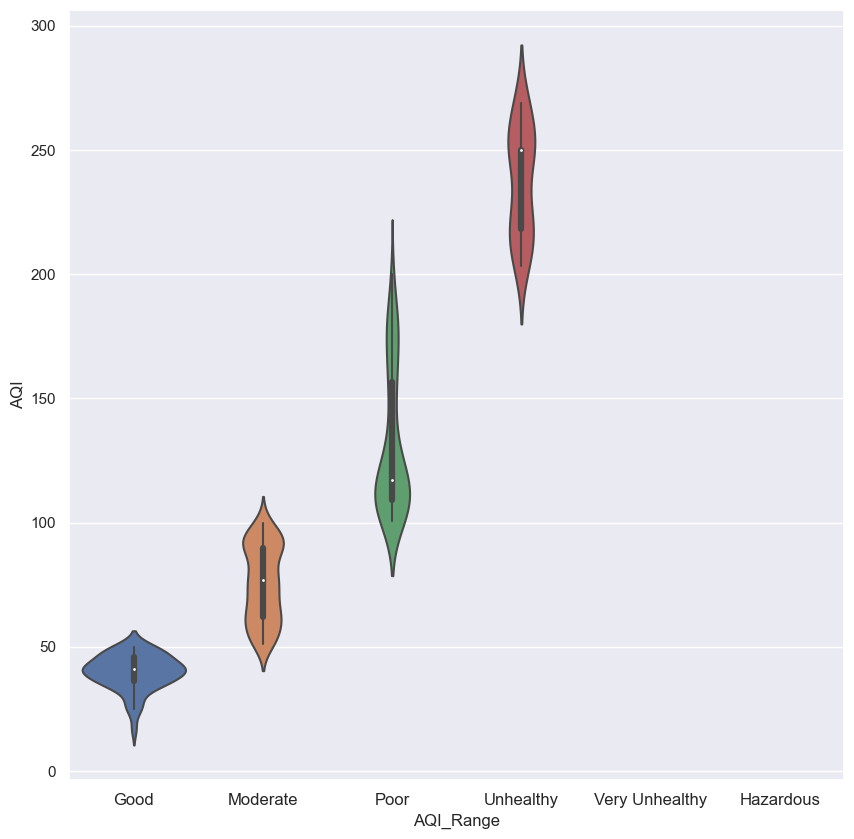

In [55]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(fontsize=12)
df['AQI']=pd.to_numeric(df['AQI'])
sns.violinplot(data=df,x='AQI_Range',y='AQI',order=['Good', 'Moderate', 'Poor', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])


Text(0.5, 1.0, 'AQI Values Distribution')

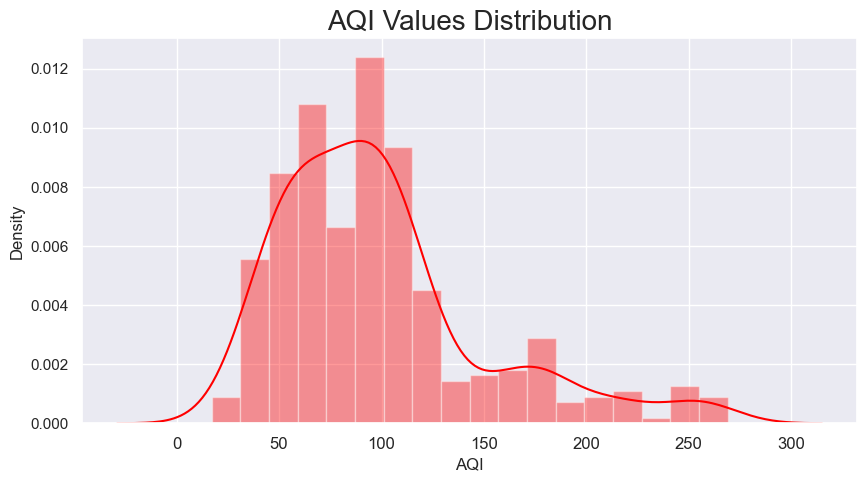

In [56]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=12)
p=sns.distplot(df['AQI'],color='Red')
p.axes.set_title("AQI Values Distribution",fontsize=20)

Categorical Conversion
Our analysis requires at least one independent variable which needs to be a multi-class categorical variable and a binary categorical variable and its conversion to numeric data.
We will be using cat coding and one hot encoding for the same, cat coding converts categorical data into numeric for use , basically it provides numbers for ordinal data. Cat coding creates a mapping of our sortable categories, e. g. old < renovated < new → 0, 1, 2

One hot encoding (binary values from categorical data) A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

And in our dataset state is a multiclass variable and type is a binary categorical variable. So we are changing them eventually. Further in our analysis we will be using cat coding only to convert our ordinal data.

We have mostly used cat coding as it changes the target column itself while in one hot encoding based on number of types the column holds, new columns be created according to the type with binary values i.e 1 and 0 . Thereby making data set much more complex and increasing redundancy. Although both methods be used for categorical to numeric conversion , we have preferred cat coding over one hot encoding

In [57]:
df['state_label'] = df['State_UT'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
cat_columns
#df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
#dataset["type_label"]=dataset["type"].astype(str)
#dataset["type_label"] = np.where(dataset["type"].str.contains('Residential, Rural and other Areas'), 1, 0)

Index(['state_label'], dtype='object')

In [58]:
df['state_label']

0      Andhra Pradesh
1      Andhra Pradesh
2      Andhra Pradesh
3      Andhra Pradesh
4      Andhra Pradesh
            ...      
392       West Bengal
393       West Bengal
394       West Bengal
395       West Bengal
396       West Bengal
Name: state_label, Length: 397, dtype: category
Categories (33, object): ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

## Regplot

Distribution of important independent variables and their relation with dependent variable i.e AQI is being depicted by the graph. Basically it plots data and a linear regression model fit.

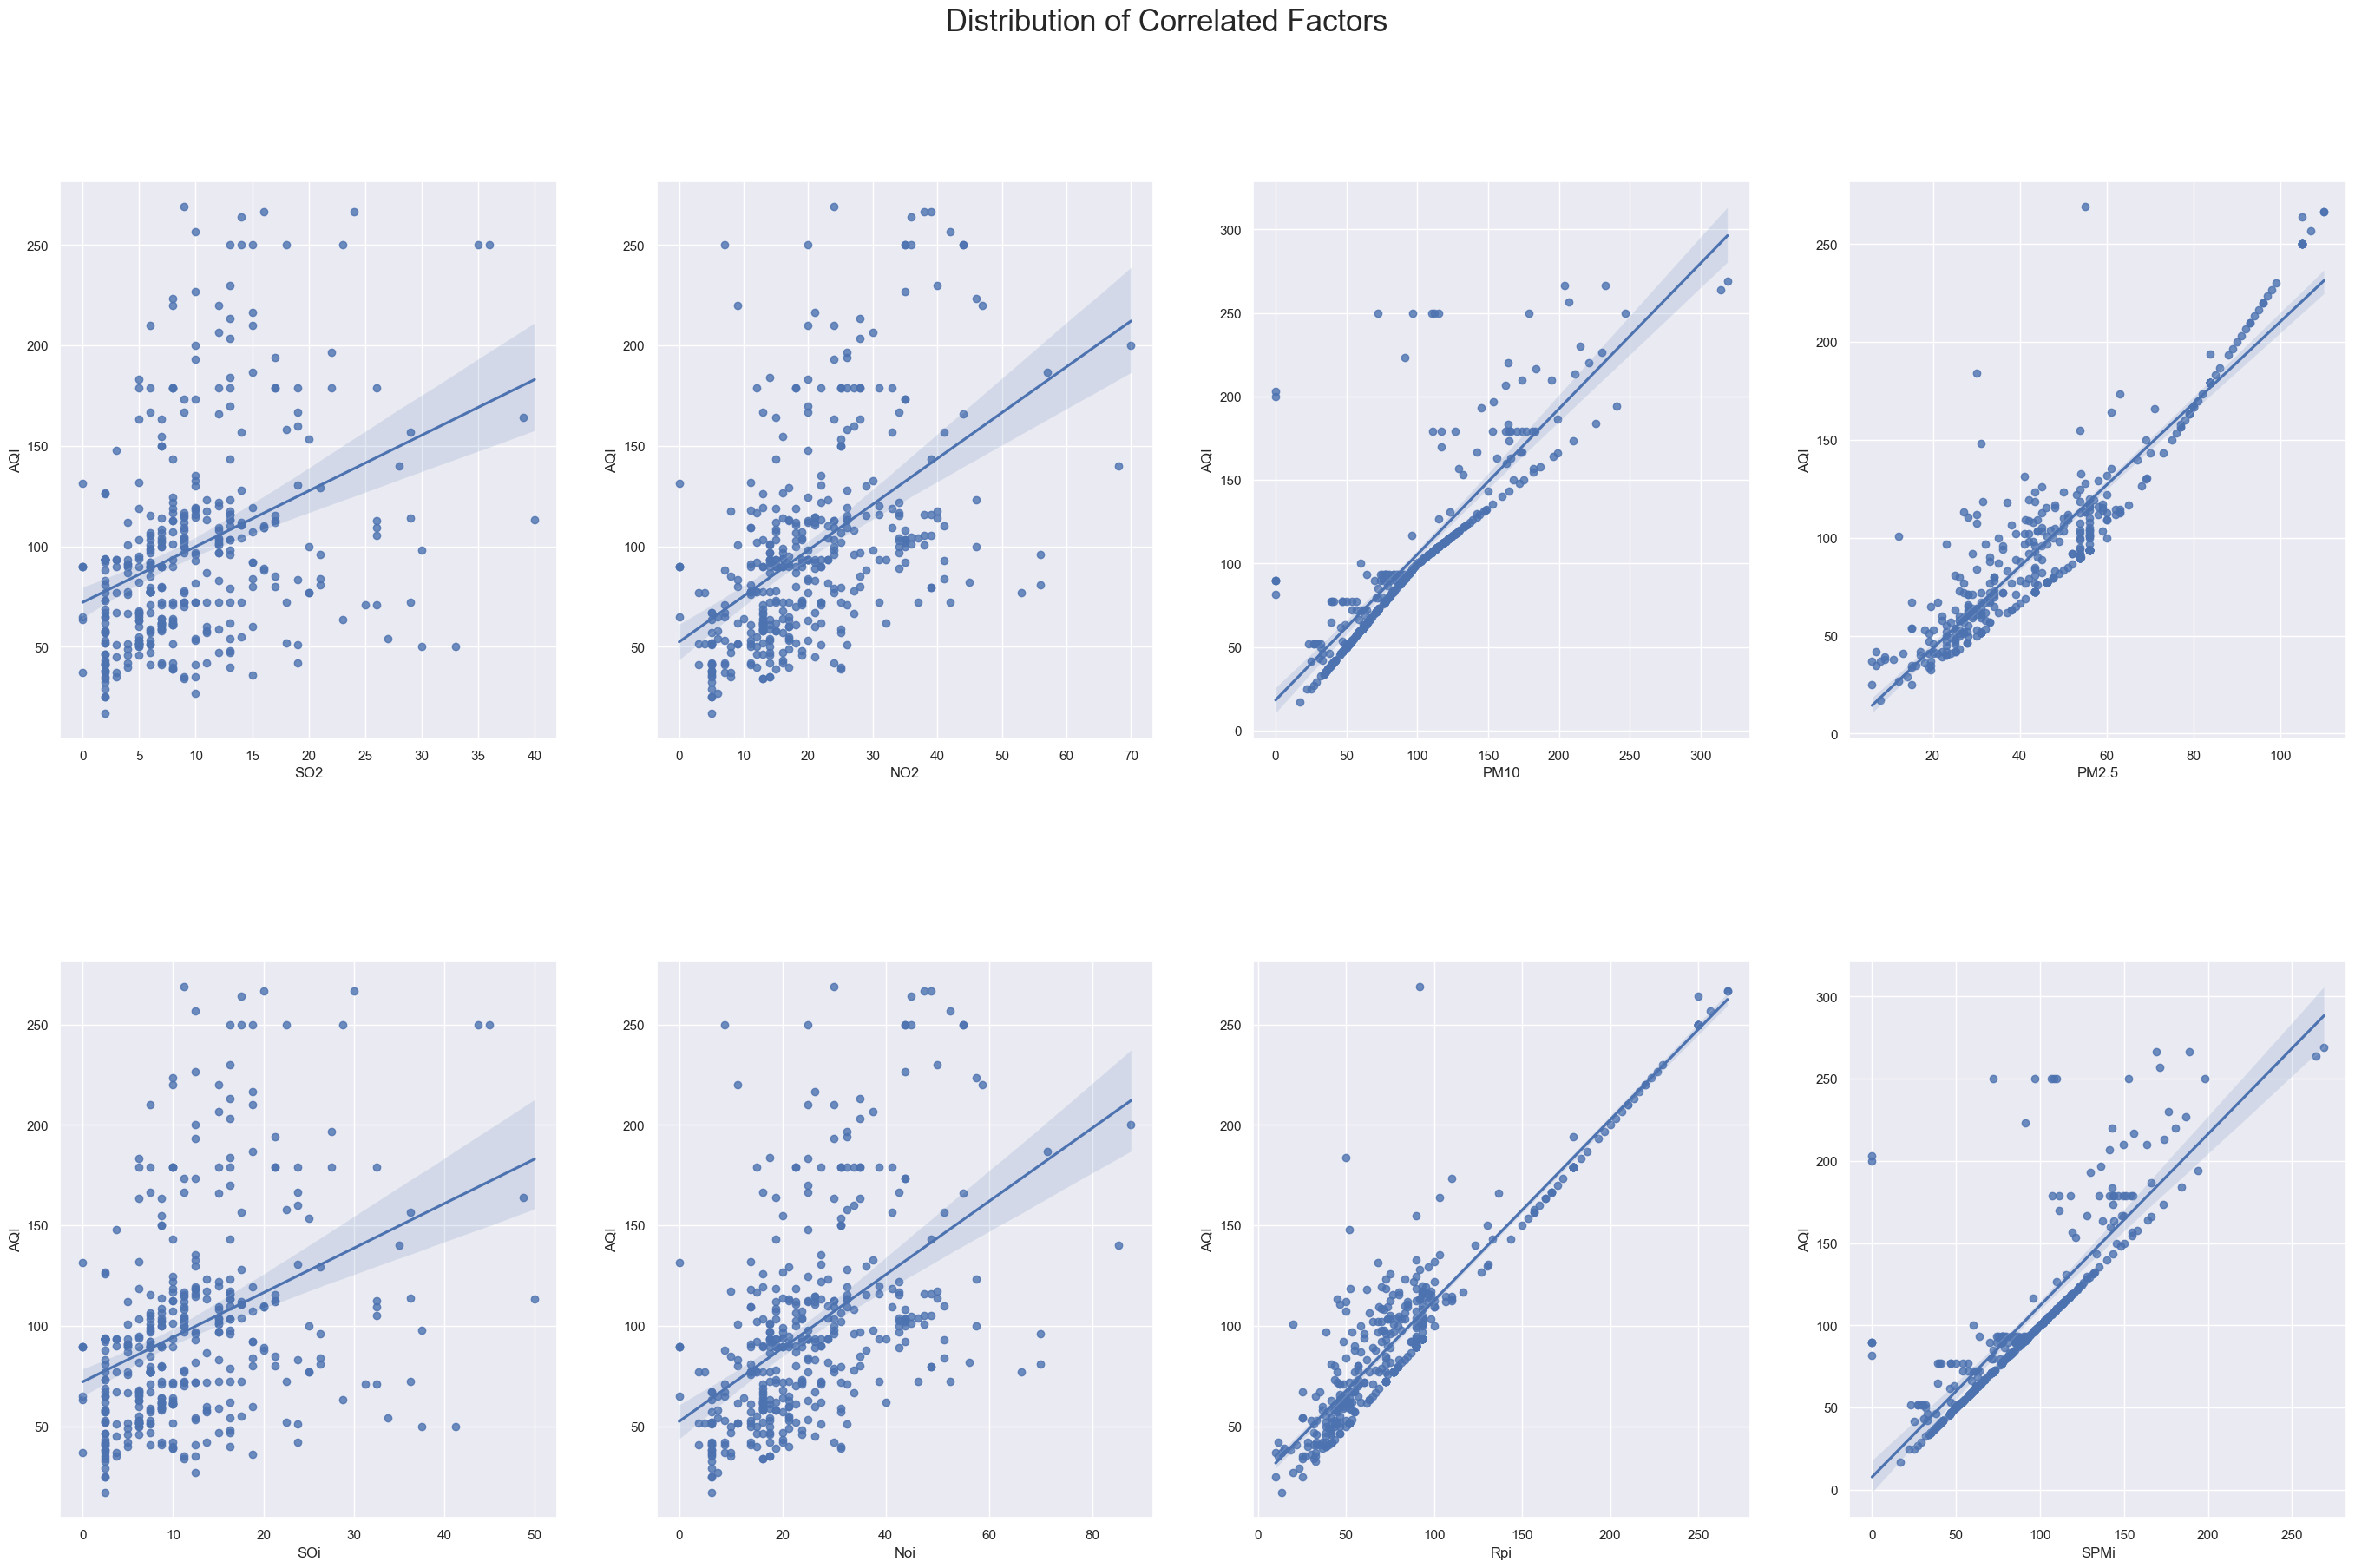

In [59]:


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(34,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in df.columns.values[2::]:
    if ((col!='AQI')&(col!='State_UT')&(col!='City')&(col!='type')&(col!='date')&(col!='year')&(col!='state_label')&(col!='type_label')):
      
        colums=np.array(df[col])
        z[col]=colums
#p=z.loc[z.index]

for i in range(2):
    for j in range(4):
        
        #x=z.index.values[i*3+j]
        #sns.barplot(z.index[i*3+j],z.values[i*3+j])
        #x=z.index.values[i*3+j]
        
        y_label=z.index[i*4+j]
        x_label=z[i*4+j]
        
        sns.regplot(data=df, x=z.index[i*4+j], y='AQI',ax=axes[i,j])


fig.suptitle('Distribution of Correlated Factors', fontsize='25')
plt.show()

In [60]:
df['AQI_Range'].value_counts()

Moderate     196
Poor         128
Good          50
Unhealthy     23
Name: AQI_Range, dtype: int64

In [61]:
df.head(10)

,State_UT,City,SO2,NO2,PM10,PM2.5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range,state_label
0,Andhra Pradesh,Amaravati,14.0,12.0,55.0,28.0,17.50,15.00,46.666667,55.0,55.0,Moderate,Andhra Pradesh
1,Andhra Pradesh,Anatapur,7.0,16.0,64.0,30.0,8.75,20.00,50.000000,64.0,64.0,Moderate,Andhra Pradesh
2,Andhra Pradesh,Chittor,5.0,14.0,46.0,25.0,6.25,17.50,41.666667,46.0,46.0,Good,Andhra Pradesh
3,Andhra Pradesh,Eluru,5.0,17.0,63.0,30.0,6.25,21.25,50.000000,63.0,63.0,Moderate,Andhra Pradesh
4,Andhra Pradesh,Guntur,5.0,17.0,60.0,29.0,6.25,21.25,48.333333,60.0,60.0,Moderate,Andhra Pradesh
5,Andhra Pradesh,Kadapa,5.0,14.0,53.0,26.0,6.25,17.50,43.333333,53.0,53.0,Moderate,Andhra Pradesh
6,Andhra Pradesh,Kakinada,8.0,14.0,61.0,28.0,10.00,17.50,46.666667,61.0,61.0,Moderate,Andhra Pradesh
7,Andhra Pradesh,Kurnool,6.0,15.0,58.0,26.0,7.50,18.75,43.333333,58.0,58.0,Moderate,Andhra Pradesh
8,Andhra Pradesh,Nellore,5.0,17.0,55.0,23.0,6.25,21.25,38.333333,55.0,55.0,Moderate,Andhra Pradesh
9,Andhra Pradesh,Ongole,5.0,17.0,53.0,18.0,6.25,21.25,30.000000,53.0,53.0,Moderate,Andhra Pradesh


In [100]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,17.50,15.00,46.666667,55.0
1,8.75,20.00,50.000000,64.0
2,6.25,17.50,41.666667,46.0
3,6.25,21.25,50.000000,63.0
4,6.25,21.25,48.333333,60.0


In [63]:
X11=df[['SO2','NO2','PM10','PM2.5']]

In [64]:
Y.head()
# the AQI column is the target column

0    55.0
1    64.0
2    46.0
3    63.0
4    60.0
Name: AQI, dtype: float64

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(317, 4) (80, 4) (317,) (80,)


## Multicollinearity

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

Why Multicollinearity is a problem?

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

VIF assesses whether factors are correlated to each other (multicollinearity) High variance inflation factor means that they "have" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity. If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be less correlated. If the VIF for a factor is near or above 5 we may have to moderately correlated factors.but if greater than 10 then those variables need to be removed.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def variance_IF(X):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif

In [67]:
##For first Linear Model
variance_IF(X)

,VIF Factor,features
0,3.552598,SOi
1,5.623127,Noi
2,5.518574,SPMi


In [68]:
variance_IF(X11)

,VIF Factor,features
0,3.551855,SO2
1,6.125045,NO2
2,9.622637,PM10
3,11.238394,PM2.5


Linear Regression
We applied linear regression model on our dataset and calculated the value for Root Mean Squared Error ,Mean Squared Error(log), AIC and BIC
Root Mean Squared Error:- Root Mean Square Error (RMSE) mathematically is the standard deviation of the residuals. Residuals is the measure od how far the data points are spreaded across the line of regression which we get by our training data set. RMSE is the measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

Mean Squared Error:-
The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. RMSE is the square root of MSE.

Akaike information criterion (AIC):-
The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

In estimating the amount of information lost by a model, AIC deals with the trade-off between the goodness of fit of the model and the simplicity of the model. In other words, AIC deals with both the risk of overfitting and the risk of underfitting.

\begin{equation*}

AIC = {2}\cdot\ {k} + {n}log(RSS/N)
\end{equation*}

where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows

Bayesian information criterion (BIC) :-
It is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model; the penalty term is larger in BIC than in AIC.

where k=number of parameters, RSS=Residual Sum of Squares and n= number of rows

P-value:-
In statistics, the p-value is a function of the observed sample results (a statistic) that is used for testing a statistical hypothesis. Before the test is performed, a threshold value is chosen, called the significance level of the test, traditionally 5% or 1% and denoted as 
.

If the p-value is equal to or smaller than the significance level (
), it suggests that the observed data are inconsistent with the assumption that the null hypothesis is true and thus that hypothesis must be rejected (but this does not automatically mean the alternative hypothesis can be accepted as true). When the p-value is calculated correctly, such a test is guaranteed to control the Type I error rate to be no greater than 
.

Table Overview:- Top 5 rows of the dataset consisting of independent variables that have p-value<0.05
And we will be using the following Independent Variables present in the given dataset for modeling our data using linear regression.

In [102]:
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'rbf')
regressor1.fit(X_train, Y_train)
#predicting train
train_pred=regressor1.predict(X_train)
#predicting on test
test_pred=regressor1.predict(X_test)

In [103]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',regressor1.score(X_train, Y_train))
print('RSquared value on test:',regressor1.score(X_test, Y_test))

print('-'*50)
MAE_train=(metrics.mean_absolute_error(Y_train,train_pred))
MAE_test=(metrics.mean_absolute_error(Y_test,test_pred))
print("MAE TrainingData = ",str(MAE_train))
print("MAE TestData = ",str(MAE_test)) 


RMSE TrainingData =  29.3214134235744
RMSE TestData =  19.915047841765492
--------------------------------------------------
RSquared value on train: 0.6857013495008686
RSquared value on test: 0.7791944059972702
--------------------------------------------------
MAE TrainingData =  14.808779826021153
MAE TestData =  10.112758871926978


In [1]:
model=LinearRegression()
model.fit(X_train,Y_train)

NameError: name 'LinearRegression' is not defined

In [70]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [96]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

print('-'*50)
MAE_train=(metrics.mean_absolute_error(Y_train,train_pred))
MAE_test=(metrics.mean_absolute_error(Y_test,test_pred))
print("MAE TrainingData = ",str(MAE_train))
print("MAE TestData = ",str(MAE_test)) 



RMSE TrainingData =  29.618930728077643
RMSE TestData =  18.335906910557885
--------------------------------------------------
RSquared value on train: 0.6792907652611873
RSquared value on test: 0.8128231412365278
--------------------------------------------------
MAE TrainingData =  18.28184263779071
MAE TestData =  14.15170488376403


SVM

In [97]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

SVR()

In [98]:
#predicting train
train_pred=regressor.predict(X_train)
#predicting on test
test_pred=regressor.predict(X_test)

In [99]:
print('RSquared value on train:',regressor.score(X_train, Y_train))
print('RSquared value on test:',regressor.score(X_test, Y_test))

RSquared value on train: 0.5143860160315694
RSquared value on test: 0.7412200212412055


In [72]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [73]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [74]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))
print('-'*50)
MAE_train=(metrics.mean_absolute_error(Y_train,train_preds))
MAE_test=(metrics.mean_absolute_error(Y_test,test_preds))
print("MAE TrainingData = ",str(MAE_train))
print("MAE TestData = ",str(MAE_test)) 

RMSE TrainingData =  0.6619178923246146
RMSE TestData =  27.219570436418827
--------------------------------------------------
RSquared value on train: 0.9998398300814174
RSquared value on test: 0.5875133493338838
--------------------------------------------------
MAE TrainingData =  0.05257623554153549
MAE TestData =  12.749454365079366


Random forest

In [75]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [76]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [77]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))
print('-'*50)
MAE_train=(metrics.mean_absolute_error(Y_train,train_preds1))
MAE_test=(metrics.mean_absolute_error(Y_test,test_preds1))
print("MAE TrainingData = ",str(MAE_train))
print("MAE TestData = ",str(MAE_test)) 


RMSE TrainingData =  10.272371097689371
RMSE TestData =  20.187501308718275
--------------------------------------------------
RSquared value on train: 0.9614242734962846
RSquared value on test: 0.773111491917602
--------------------------------------------------
MAE TrainingData =  5.204383483323546
MAE TestData =  11.663398768939388


Classification Algorithms

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [79]:
df['AQI_label'] = df['AQI_Range'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.head()

,State_UT,City,SO2,NO2,PM10,PM2.5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range,state_label,AQI_label
0,Andhra Pradesh,Amaravati,14.0,12.0,55.0,28.0,17.50,15.00,46.666667,55.0,55.0,Moderate,0,1
1,Andhra Pradesh,Anatapur,7.0,16.0,64.0,30.0,8.75,20.00,50.000000,64.0,64.0,Moderate,0,1
2,Andhra Pradesh,Chittor,5.0,14.0,46.0,25.0,6.25,17.50,41.666667,46.0,46.0,Good,0,0
3,Andhra Pradesh,Eluru,5.0,17.0,63.0,30.0,6.25,21.25,50.000000,63.0,63.0,Moderate,0,1
4,Andhra Pradesh,Guntur,5.0,17.0,60.0,29.0,6.25,21.25,48.333333,60.0,60.0,Moderate,0,1


In [104]:
X2 = df[['SOi','Noi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification 

In [105]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data 

Logistic Regression

In [106]:

#fit the model on train data 
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#predict on test
test_preds2 = log_reg.predict(X_test2)

#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))


print('-'*50)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.8150943396226416
--------------------------------------------------
Model accuracy on test is:  0.7651515151515151
KappaScore is:  0.6017518248175182


K Nearest Neighbours

In [107]:

#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))


#predict on test
test_preds5 = KNN.predict(X_test2)

print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))


print('-'*50)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))


Model accuracy on train is:  0.8905660377358491
--------------------------------------------------
KappaScore is:  0.8430727023319616
--------------------------------------------------
Model accuracy on test is:  0.9015151515151515


In [84]:
!pip install statsmodels

In [108]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
X2 = df[['SOi','Noi','Rpi', 'SPMi']]

In [110]:
mod = ols('Y ~ X2', data=df).fit()
print(mod.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9165      1.595      2.456      0.014       0.781       7.052
X2[0]          0.0982      0.082      1.194      0.233      -0.063       0.260
X2[1]         -0.0792      0.054     -1.455      0.146      -0.186       0.028
X2[2]          0.6685      0.017     39.655      0.000       0.635       0.702
X2[3]          0.4499      0.022     20.544      0.000       0.407       0.493


In [111]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [112]:
print(aov_table)

                 sum_sq     df            F         PR(>F)
X2        959180.561342    4.0  1562.552916  2.393119e-239
Residual   60157.767497  392.0          NaN            NaN


In [113]:
print("R2 = ", mod.rsquared)

R2 =  0.9409835127405392


In [92]:
X1=df[['SOi','Noi']]

In [93]:
mod = ols('Y ~ X1', data=df).fit()
print(mod.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.8614      4.683      9.794      0.000      36.655      55.068
X1[0]          1.1710      0.279      4.199      0.000       0.623       1.719
X1[1]          1.5367      0.168      9.153      0.000       1.207       1.867


In [94]:
aov_table1 = sm.stats.anova_lm(mod, typ=2)
print(aov_table1)

                 sum_sq     df         F        PR(>F)
X1        294150.161658    2.0  79.90696  7.414363e-30
Residual  725188.167181  394.0       NaN           NaN


In [95]:
print("R2 = ", mod.rsquared)

R2 =  0.2885697057947867


In [89]:
# # precision tp / (tp + fp)
# precision = precision_score(Y_test2, test_preds5)
# print('Precision on test is : %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(Y_test2, test_preds5)
# print('Recall on test is: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(Y_test2, test_preds5)
# print('F1 score on test is: %f' % f1)
# RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train2,train_preds5)))
# RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test2,test_preds5)))
# print("RMSE TrainingData = ",str(RMSE_train))
# print("RMSE TestData = ",str(RMSE_test))
# print('-'*50)
# print('RSquared value on train:',RF.score(X_train2, Y_train2))
# print('RSquared value on test:',RF.score(X_test2, Y_test2))
# print('-'*50)
# MAE_train=(metrics.mean_absolute_error(Y_train2,train_preds5))
# MAE_test=(metrics.mean_absolute_error(Y_test2,test_preds5))
# print("MAE TrainingData = ",str(MAE_train))
# print("MAE TestData = ",str(MAE_test))"
# precision tp / (tp + fp)
# precision = precision_score(Y_train2, train_preds5)
# print('Precision on train is : %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(Y_train2, train_preds5)
# print('Recall on train is : %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(Y_train2, train_preds5)
# print('F1 score on train is: %f' % f1)
# precision tp / (tp + fp)
#precision = precision_score(Y_test2, test_preds2)
#print('Precision on test is : %f' % precision)
# recall: tp / (tp + fn)
# recall = recall_score(Y_test2, test_preds2)
# print('Recall on test is: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(Y_test2, test_preds2)
# print('F1 score on test is: %f' % f1)
# precision tp / (tp + fp)
#precision = precision_score(Y_train2, train_preds2)
#print('Precision on train is : %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(Y_train2, train_preds2)
# print('Recall on train is : %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(Y_train2, train_preds2)